# Creating a consumer resource model from smetana data
- load and parse the smetana data
- convert the data into a SBML model (with first order reactions)
- simulate the model using tellurium 
- convert into a mira model and simulate the model using pyciemss

### import packages and load data

In [1]:
import pandas as pd
import tellurium as te
import antimony as at
import simplesbml 
import mira
import libsbml
import numpy as np
from mira.sources.sbml import template_model_from_sbml_file
from mira.metamodel import Distribution

import os
import pyciemss
import torch

import pyciemss.visuals.plots as plots
import pyciemss.visuals.vega as vega
import pyciemss.visuals.trajectories as trajectories

from pyciemss.integration_utils.intervention_builder import (
    param_value_objective,
    start_time_objective,
    start_time_param_value_objective,
)


/var/folders/kc/g6x5cwr96dn6lx9m4bq_4m_h0000gn/T/ipykernel_74041/2005571738.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Exploratory analysis of smetana data

In [2]:
smetana_file = "../data/smetana_results/smetana_results_gurobi_victor_detailed.tsv"
smetana_df = pd.read_csv(smetana_file, sep='\t')

### create antimony model using first order reaction kinetics 

for each row of the smetana data:

- donor-to-compound reaction: donor -> compound; rate: k_d*donor

- compound-to-receiver reaction: compound -> receiver; k_r*compound

- use uniform(0,1) initial values for the model variables (donor, compound, receiver)

- k_d = scs and k_r = mus for that row 

In [3]:

seed = 0
np.random.seed(seed)

reaction_list = []
parameter_list = []
initial_values_set = set()


for index, row in smetana_df.iterrows():
    donor_reaction = f'\t{row.donor} -> {row.compound}; k_d{index}*{row.donor}'
    receiver_reaction = f'\t{row.compound} -> {row.receiver}; k_r{index}*{row.compound}'
    reaction_list.extend([donor_reaction,receiver_reaction])
    parameter_list.extend([f'\tk_d{index}={row.scs}',f'\tk_r{index}={row.mus}'])
    initial_values_set.add(row.donor)
    initial_values_set.add(row.compound)
    initial_values_set.add(row.receiver)

initial_values_string = "\n".join([f"\t{name}={np.random.uniform(0,1)}" for name in initial_values_set])
species_names_string = "\n".join([f'\t{species} is "{species}"' for species in initial_values_set])

reaction_string = "\n".join(reaction_list)
parameter_string = "\n".join(parameter_list)

antimony_str = f"""
model smetana
{reaction_string}
{parameter_string}
{initial_values_string}
{species_names_string}
end
"""


antimony_file = 'test_antimony_file.txt'

with open(antimony_file, 'w') as f:
    f.write(antimony_str)

### save antimony model as SBML using tellurium and libroadrunner

In [4]:
smbl_file = 'smetana_carbstor_consumer_resource.xml'
rr_model = te.loada(antimony_file)
rr_model.exportToSBML(smbl_file)

In [ ]:
antimony_str = """
model smetana
	updated_csc031 -> M_arg__L_e; k_d0*updated_csc031
	M_arg__L_e -> updated_csc009; k_r0*M_arg__L_e
	updated_csc031 -> M_gua_e; k_d1*updated_csc031
	M_gua_e -> updated_csc009; k_r1*M_gua_e
	updated_csc031 -> M_h2s_e; k_d2*updated_csc031
	M_h2s_e -> updated_csc009; k_r2*M_h2s_e
	updated_csc031 -> M_hom__L_e; k_d3*updated_csc031
	M_hom__L_e -> updated_csc009; k_r3*M_hom__L_e
	updated_csc031 -> M_nh4_e; k_d4*updated_csc031
	M_nh4_e -> updated_csc009; k_r4*M_nh4_e
	updated_csc031 -> M_orn_e; k_d5*updated_csc031
	M_orn_e -> updated_csc009; k_r5*M_orn_e
	updated_csc040 -> M_4abut_e; k_d6*updated_csc040
	M_4abut_e -> updated_csc009; k_r6*M_4abut_e
	updated_csc040 -> M_arg__L_e; k_d7*updated_csc040
	M_arg__L_e -> updated_csc009; k_r7*M_arg__L_e
	updated_csc040 -> M_asp__L_e; k_d8*updated_csc040
	M_asp__L_e -> updated_csc009; k_r8*M_asp__L_e
	updated_csc040 -> M_fe3_e; k_d9*updated_csc040
	M_fe3_e -> updated_csc009; k_r9*M_fe3_e
	updated_csc040 -> M_fe3pyovd_kt_e; k_d10*updated_csc040
	M_fe3pyovd_kt_e -> updated_csc009; k_r10*M_fe3pyovd_kt_e
	updated_csc040 -> M_glu__L_e; k_d11*updated_csc040
	M_glu__L_e -> updated_csc009; k_r11*M_glu__L_e
	updated_csc040 -> M_gua_e; k_d12*updated_csc040
	M_gua_e -> updated_csc009; k_r12*M_gua_e
	updated_csc040 -> M_h2s_e; k_d13*updated_csc040
	M_h2s_e -> updated_csc009; k_r13*M_h2s_e
	updated_csc040 -> M_hom__L_e; k_d14*updated_csc040
	M_hom__L_e -> updated_csc009; k_r14*M_hom__L_e
	updated_csc040 -> M_nh4_e; k_d15*updated_csc040
	M_nh4_e -> updated_csc009; k_r15*M_nh4_e
	updated_csc040 -> M_orn_e; k_d16*updated_csc040
	M_orn_e -> updated_csc009; k_r16*M_orn_e
	updated_csc040 -> M_pi_e; k_d17*updated_csc040
	M_pi_e -> updated_csc009; k_r17*M_pi_e
	updated_csc040 -> M_pydxn_e; k_d18*updated_csc040
	M_pydxn_e -> updated_csc009; k_r18*M_pydxn_e
	updated_csc040 -> M_s_e; k_d19*updated_csc040
	M_s_e -> updated_csc009; k_r19*M_s_e
	updated_csc040 -> M_ser__L_e; k_d20*updated_csc040
	M_ser__L_e -> updated_csc009; k_r20*M_ser__L_e
	updated_csc040 -> M_urea_e; k_d21*updated_csc040
	M_urea_e -> updated_csc009; k_r21*M_urea_e
	updated_csc052 -> M_arg__L_e; k_d22*updated_csc052
	M_arg__L_e -> updated_csc009; k_r22*M_arg__L_e
	updated_csc052 -> M_fe3_e; k_d23*updated_csc052
	M_fe3_e -> updated_csc009; k_r23*M_fe3_e
	updated_csc052 -> M_glu__L_e; k_d24*updated_csc052
	M_glu__L_e -> updated_csc009; k_r24*M_glu__L_e
	updated_csc052 -> M_gthrd_e; k_d25*updated_csc052
	M_gthrd_e -> updated_csc009; k_r25*M_gthrd_e
	updated_csc052 -> M_h2s_e; k_d26*updated_csc052
	M_h2s_e -> updated_csc009; k_r26*M_h2s_e
	updated_csc052 -> M_nh4_e; k_d27*updated_csc052
	M_nh4_e -> updated_csc009; k_r27*M_nh4_e
	updated_csc052 -> M_orn_e; k_d28*updated_csc052
	M_orn_e -> updated_csc009; k_r28*M_orn_e
	updated_csc052 -> M_ptrc_e; k_d29*updated_csc052
	M_ptrc_e -> updated_csc009; k_r29*M_ptrc_e
	updated_csc052 -> M_s_e; k_d30*updated_csc052
	M_s_e -> updated_csc009; k_r30*M_s_e
	updated_csc052 -> M_urea_e; k_d31*updated_csc052
	M_urea_e -> updated_csc009; k_r31*M_urea_e
	csc043 -> M_arg__L_e; k_d32*csc043
	M_arg__L_e -> updated_csc009; k_r32*M_arg__L_e
	csc043 -> M_gua_e; k_d33*csc043
	M_gua_e -> updated_csc009; k_r33*M_gua_e
	csc043 -> M_h2s_e; k_d34*csc043
	M_h2s_e -> updated_csc009; k_r34*M_h2s_e
	csc043 -> M_nh4_e; k_d35*csc043
	M_nh4_e -> updated_csc009; k_r35*M_nh4_e
	csc043 -> M_s_e; k_d36*csc043
	M_s_e -> updated_csc009; k_r36*M_s_e
	csc043 -> M_xylan4_e; k_d37*csc043
	M_xylan4_e -> updated_csc009; k_r37*M_xylan4_e
	updated_csc009 -> M_fe3_e; k_d38*updated_csc009
	M_fe3_e -> updated_csc031; k_r38*M_fe3_e
	updated_csc009 -> M_fe3pyovd_kt_e; k_d39*updated_csc009
	M_fe3pyovd_kt_e -> updated_csc031; k_r39*M_fe3pyovd_kt_e
	updated_csc009 -> M_glyald_e; k_d40*updated_csc009
	M_glyald_e -> updated_csc031; k_r40*M_glyald_e
	updated_csc009 -> M_glyc_e; k_d41*updated_csc009
	M_glyc_e -> updated_csc031; k_r41*M_glyc_e
	updated_csc009 -> M_rib__D_e; k_d42*updated_csc009
	M_rib__D_e -> updated_csc031; k_r42*M_rib__D_e
	updated_csc040 -> M_fe3_e; k_d43*updated_csc040
	M_fe3_e -> updated_csc031; k_r43*M_fe3_e
	updated_csc040 -> M_fe3pyovd_kt_e; k_d44*updated_csc040
	M_fe3pyovd_kt_e -> updated_csc031; k_r44*M_fe3pyovd_kt_e
	updated_csc040 -> M_glyc_e; k_d45*updated_csc040
	M_glyc_e -> updated_csc031; k_r45*M_glyc_e
	updated_csc040 -> M_pi_e; k_d46*updated_csc040
	M_pi_e -> updated_csc031; k_r46*M_pi_e
	updated_csc052 -> M_fe3_e; k_d47*updated_csc052
	M_fe3_e -> updated_csc031; k_r47*M_fe3_e
	updated_csc052 -> M_glyald_e; k_d48*updated_csc052
	M_glyald_e -> updated_csc031; k_r48*M_glyald_e
	updated_csc052 -> M_glyc_e; k_d49*updated_csc052
	M_glyc_e -> updated_csc031; k_r49*M_glyc_e
	updated_csc052 -> M_rib__D_e; k_d50*updated_csc052
	M_rib__D_e -> updated_csc031; k_r50*M_rib__D_e
	csc043 -> M_glyald_e; k_d51*csc043
	M_glyald_e -> updated_csc031; k_r51*M_glyald_e
	csc043 -> M_glyc_e; k_d52*csc043
	M_glyc_e -> updated_csc031; k_r52*M_glyc_e
	csc043 -> M_rib__D_e; k_d53*csc043
	M_rib__D_e -> updated_csc031; k_r53*M_rib__D_e
	csc043 -> M_xylan4_e; k_d54*csc043
	M_xylan4_e -> updated_csc031; k_r54*M_xylan4_e
	updated_csc009 -> M_arg__L_e; k_d55*updated_csc009
	M_arg__L_e -> updated_csc040; k_r55*M_arg__L_e
	updated_csc009 -> M_fe3_e; k_d56*updated_csc009
	M_fe3_e -> updated_csc040; k_r56*M_fe3_e
	updated_csc009 -> M_fe3pyovd_kt_e; k_d57*updated_csc009
	M_fe3pyovd_kt_e -> updated_csc040; k_r57*M_fe3pyovd_kt_e
	updated_csc009 -> M_hom__L_e; k_d58*updated_csc009
	M_hom__L_e -> updated_csc040; k_r58*M_hom__L_e
	updated_csc009 -> M_lys__L_e; k_d59*updated_csc009
	M_lys__L_e -> updated_csc040; k_r59*M_lys__L_e
	updated_csc009 -> M_nh4_e; k_d60*updated_csc009
	M_nh4_e -> updated_csc040; k_r60*M_nh4_e
	updated_csc009 -> M_o2_e; k_d61*updated_csc009
	M_o2_e -> updated_csc040; k_r61*M_o2_e
	updated_csc009 -> M_orn_e; k_d62*updated_csc009
	M_orn_e -> updated_csc040; k_r62*M_orn_e
	updated_csc031 -> M_arg__L_e; k_d63*updated_csc031
	M_arg__L_e -> updated_csc040; k_r63*M_arg__L_e
	updated_csc031 -> M_gua_e; k_d64*updated_csc031
	M_gua_e -> updated_csc040; k_r64*M_gua_e
	updated_csc031 -> M_hom__L_e; k_d65*updated_csc031
	M_hom__L_e -> updated_csc040; k_r65*M_hom__L_e
	updated_csc031 -> M_lys__L_e; k_d66*updated_csc031
	M_lys__L_e -> updated_csc040; k_r66*M_lys__L_e
	updated_csc031 -> M_nh4_e; k_d67*updated_csc031
	M_nh4_e -> updated_csc040; k_r67*M_nh4_e
	updated_csc031 -> M_orn_e; k_d68*updated_csc031
	M_orn_e -> updated_csc040; k_r68*M_orn_e
	updated_csc052 -> M_arg__L_e; k_d69*updated_csc052
	M_arg__L_e -> updated_csc040; k_r69*M_arg__L_e
	updated_csc052 -> M_fe3_e; k_d70*updated_csc052
	M_fe3_e -> updated_csc040; k_r70*M_fe3_e
	updated_csc052 -> M_lys__L_e; k_d71*updated_csc052
	M_lys__L_e -> updated_csc040; k_r71*M_lys__L_e
	updated_csc052 -> M_nh4_e; k_d72*updated_csc052
	M_nh4_e -> updated_csc040; k_r72*M_nh4_e
	updated_csc052 -> M_orn_e; k_d73*updated_csc052
	M_orn_e -> updated_csc040; k_r73*M_orn_e
	csc043 -> M_arg__L_e; k_d74*csc043
	M_arg__L_e -> updated_csc040; k_r74*M_arg__L_e
	csc043 -> M_gua_e; k_d75*csc043
	M_gua_e -> updated_csc040; k_r75*M_gua_e
	csc043 -> M_lys__L_e; k_d76*csc043
	M_lys__L_e -> updated_csc040; k_r76*M_lys__L_e
	csc043 -> M_nh4_e; k_d77*csc043
	M_nh4_e -> updated_csc040; k_r77*M_nh4_e
	csc043 -> M_ura_e; k_d78*csc043
	M_ura_e -> updated_csc040; k_r78*M_ura_e
	updated_csc009 -> M_glyc_e; k_d79*updated_csc009
	M_glyc_e -> updated_csc052; k_r79*M_glyc_e
	updated_csc009 -> M_h2s_e; k_d80*updated_csc009
	M_h2s_e -> updated_csc052; k_r80*M_h2s_e
	updated_csc009 -> M_o2_e; k_d81*updated_csc009
	M_o2_e -> updated_csc052; k_r81*M_o2_e
	updated_csc031 -> M_glyc_e; k_d82*updated_csc031
	M_glyc_e -> updated_csc052; k_r82*M_glyc_e
	updated_csc031 -> M_h2s_e; k_d83*updated_csc031
	M_h2s_e -> updated_csc052; k_r83*M_h2s_e
	updated_csc031 -> M_xyl__D_e; k_d84*updated_csc031
	M_xyl__D_e -> updated_csc052; k_r84*M_xyl__D_e
	updated_csc040 -> M_glyc_e; k_d85*updated_csc040
	M_glyc_e -> updated_csc052; k_r85*M_glyc_e
	updated_csc040 -> M_h2s_e; k_d86*updated_csc040
	M_h2s_e -> updated_csc052; k_r86*M_h2s_e
	updated_csc040 -> M_pi_e; k_d87*updated_csc040
	M_pi_e -> updated_csc052; k_r87*M_pi_e
	updated_csc040 -> M_s_e; k_d88*updated_csc040
	M_s_e -> updated_csc052; k_r88*M_s_e
	csc043 -> M_glyc_e; k_d89*csc043
	M_glyc_e -> updated_csc052; k_r89*M_glyc_e
	csc043 -> M_h2s_e; k_d90*csc043
	M_h2s_e -> updated_csc052; k_r90*M_h2s_e
	csc043 -> M_s_e; k_d91*csc043
	M_s_e -> updated_csc052; k_r91*M_s_e
	csc043 -> M_xylan4_e; k_d92*csc043
	M_xylan4_e -> updated_csc052; k_r92*M_xylan4_e
	updated_csc009 -> M_arg__L_e; k_d93*updated_csc009
	M_arg__L_e -> csc043; k_r93*M_arg__L_e
	updated_csc009 -> M_h2s_e; k_d94*updated_csc009
	M_h2s_e -> csc043; k_r94*M_h2s_e
	updated_csc009 -> M_lys__L_e; k_d95*updated_csc009
	M_lys__L_e -> csc043; k_r95*M_lys__L_e
	updated_csc009 -> M_o2_e; k_d96*updated_csc009
	M_o2_e -> csc043; k_r96*M_o2_e
	updated_csc009 -> M_ppap_e; k_d97*updated_csc009
	M_ppap_e -> csc043; k_r97*M_ppap_e
	updated_csc031 -> M_arg__L_e; k_d98*updated_csc031
	M_arg__L_e -> csc043; k_r98*M_arg__L_e
	updated_csc031 -> M_h2s_e; k_d99*updated_csc031
	M_h2s_e -> csc043; k_r99*M_h2s_e
	updated_csc031 -> M_lys__L_e; k_d100*updated_csc031
	M_lys__L_e -> csc043; k_r100*M_lys__L_e
	updated_csc040 -> M_arg__L_e; k_d101*updated_csc040
	M_arg__L_e -> csc043; k_r101*M_arg__L_e
	updated_csc040 -> M_h2s_e; k_d102*updated_csc040
	M_h2s_e -> csc043; k_r102*M_h2s_e
	updated_csc040 -> M_lys__L_e; k_d103*updated_csc040
	M_lys__L_e -> csc043; k_r103*M_lys__L_e
	updated_csc040 -> M_s_e; k_d104*updated_csc040
	M_s_e -> csc043; k_r104*M_s_e
	updated_csc052 -> M_arg__L_e; k_d105*updated_csc052
	M_arg__L_e -> csc043; k_r105*M_arg__L_e
	updated_csc052 -> M_h2s_e; k_d106*updated_csc052
	M_h2s_e -> csc043; k_r106*M_h2s_e
	updated_csc052 -> M_lys__L_e; k_d107*updated_csc052
	M_lys__L_e -> csc043; k_r107*M_lys__L_e
	updated_csc052 -> M_s_e; k_d108*updated_csc052
	M_s_e -> csc043; k_r108*M_s_e
	k_d0=0.3333333333333333
	k_r0=0.08
	k_d1=0.3333333333333333
	k_r1=0.1
	k_d2=0.3333333333333333
	k_r2=0.33
	k_d3=0.3333333333333333
	k_r3=0.07
	k_d4=0.3333333333333333
	k_r4=0.09
	k_d5=0.3333333333333333
	k_r5=0.03
	k_d6=1.0
	k_r6=0.01
	k_d7=1.0
	k_r7=0.08
	k_d8=1.0
	k_r8=0.06
	k_d9=1.0
	k_r9=0.39
	k_d10=1.0
	k_r10=0.61
	k_d11=1.0
	k_r11=0.06
	k_d12=1.0
	k_r12=0.1
	k_d13=1.0
	k_r13=0.33
	k_d14=1.0
	k_r14=0.07
	k_d15=1.0
	k_r15=0.09
	k_d16=1.0
	k_r16=0.03
	k_d17=1.0
	k_r17=0.49
	k_d18=1.0
	k_r18=0.02
	k_d19=1.0
	k_r19=0.33
	k_d20=1.0
	k_r20=0.12
	k_d21=1.0
	k_r21=0.07
	k_d22=0.3333333333333333
	k_r22=0.08
	k_d23=0.3333333333333333
	k_r23=0.39
	k_d24=0.3333333333333333
	k_r24=0.06
	k_d25=0.3333333333333333
	k_r25=0.04
	k_d26=0.3333333333333333
	k_r26=0.33
	k_d27=0.3333333333333333
	k_r27=0.09
	k_d28=0.3333333333333333
	k_r28=0.03
	k_d29=0.3333333333333333
	k_r29=0.01
	k_d30=0.3333333333333333
	k_r30=0.33
	k_d31=0.3333333333333333
	k_r31=0.07
	k_d32=1.0
	k_r32=0.08
	k_d33=1.0
	k_r33=0.1
	k_d34=1.0
	k_r34=0.33
	k_d35=1.0
	k_r35=0.09
	k_d36=1.0
	k_r36=0.33
	k_d37=1.0
	k_r37=1.0
	k_d38=1.0
	k_r38=1.0
	k_d39=1.0
	k_r39=0.89
	k_d40=1.0
	k_r40=0.48
	k_d41=1.0
	k_r41=0.06
	k_d42=1.0
	k_r42=0.02
	k_d43=1.0
	k_r43=1.0
	k_d44=1.0
	k_r44=0.89
	k_d45=1.0
	k_r45=0.06
	k_d46=1.0
	k_r46=1.0
	k_d47=0.5
	k_r47=1.0
	k_d48=0.5
	k_r48=0.48
	k_d49=0.5
	k_r49=0.06
	k_d50=0.5
	k_r50=0.02
	k_d51=1.0
	k_r51=0.48
	k_d52=1.0
	k_r52=0.06
	k_d53=1.0
	k_r53=0.02
	k_d54=1.0
	k_r54=0.44
	k_d55=1.0
	k_r55=0.06
	k_d56=1.0
	k_r56=0.15
	k_d57=1.0
	k_r57=0.79
	k_d58=1.0
	k_r58=0.04
	k_d59=1.0
	k_r59=0.16
	k_d60=1.0
	k_r60=0.05
	k_d61=1.0
	k_r61=0.93
	k_d62=1.0
	k_r62=0.18
	k_d63=0.3333333333333333
	k_r63=0.06
	k_d64=0.3333333333333333
	k_r64=0.19
	k_d65=0.3333333333333333
	k_r65=0.04
	k_d66=0.3333333333333333
	k_r66=0.16
	k_d67=0.3333333333333333
	k_r67=0.05
	k_d68=0.3333333333333333
	k_r68=0.18
	k_d69=0.3333333333333333
	k_r69=0.06
	k_d70=0.3333333333333333
	k_r70=0.15
	k_d71=0.3333333333333333
	k_r71=0.16
	k_d72=0.3333333333333333
	k_r72=0.05
	k_d73=0.3333333333333333
	k_r73=0.18
	k_d74=1.0
	k_r74=0.06
	k_d75=1.0
	k_r75=0.19
	k_d76=1.0
	k_r76=0.16
	k_d77=1.0
	k_r77=0.05
	k_d78=1.0
	k_r78=0.07
	k_d79=1.0
	k_r79=0.1
	k_d80=1.0
	k_r80=0.43
	k_d81=1.0
	k_r81=1.0
	k_d82=0.5
	k_r82=0.1
	k_d83=0.5
	k_r83=0.43
	k_d84=0.5
	k_r84=0.36
	k_d85=1.0
	k_r85=0.1
	k_d86=1.0
	k_r86=0.43
	k_d87=1.0
	k_r87=0.05
	k_d88=1.0
	k_r88=0.31
	k_d89=1.0
	k_r89=0.1
	k_d90=1.0
	k_r90=0.43
	k_d91=1.0
	k_r91=0.31
	k_d92=1.0
	k_r92=0.54
	k_d93=1.0
	k_r93=0.22
	k_d94=1.0
	k_r94=0.78
	k_d95=1.0
	k_r95=0.46
	k_d96=1.0
	k_r96=1.0
	k_d97=1.0
	k_r97=1.0
	k_d98=0.3333333333333333
	k_r98=0.22
	k_d99=0.3333333333333333
	k_r99=0.78
	k_d100=0.3333333333333333
	k_r100=0.46
	k_d101=1.0
	k_r101=0.22
	k_d102=1.0
	k_r102=0.78
	k_d103=1.0
	k_r103=0.46
	k_d104=1.0
	k_r104=0.22
	k_d105=0.3333333333333333
	k_r105=0.22
	k_d106=0.3333333333333333
	k_r106=0.78
	k_d107=0.3333333333333333
	k_r107=0.46
	k_d108=0.3333333333333333
	k_r108=0.22
	M_hom__L_e=0.5488135039273248
	M_lys__L_e=0.7151893663724195
	M_4abut_e=0.6027633760716439
	M_urea_e=0.5448831829968969
	M_fe3_e=0.4236547993389047
	M_rib__D_e=0.6458941130666561
	M_ura_e=0.4375872112626925
	M_gthrd_e=0.8917730007820798
	updated_csc052=0.9636627605010293
	M_glu__L_e=0.3834415188257777
	M_xylan4_e=0.7917250380826646
	M_glyc_e=0.5288949197529045
	M_arg__L_e=0.5680445610939323
	updated_csc040=0.925596638292661
	csc043=0.07103605819788694
	M_orn_e=0.08712929970154071
	M_fe3pyovd_kt_e=0.02021839744032572
	M_ptrc_e=0.832619845547938
	M_o2_e=0.7781567509498505
	M_h2s_e=0.8700121482468192
	updated_csc031=0.978618342232764
	M_gua_e=0.7991585642167236
	M_s_e=0.46147936225293185
	M_nh4_e=0.7805291762864555
	M_ppap_e=0.11827442586893322
	updated_csc009=0.6399210213275238
	M_pydxn_e=0.1433532874090464
	M_ser__L_e=0.9446689170495839
	M_asp__L_e=0.5218483217500717
	M_xyl__D_e=0.4146619399905236
	M_pi_e=0.26455561210462697
	M_glyald_e=0.7742336894342167
	M_hom__L_e is "M_hom__L_e"
	M_lys__L_e is "M_lys__L_e"
	M_4abut_e is "M_4abut_e"
	M_urea_e is "M_urea_e"
	M_fe3_e is "M_fe3_e"
	M_rib__D_e is "M_rib__D_e"
	M_ura_e is "M_ura_e"
	M_gthrd_e is "M_gthrd_e"
	updated_csc052 is "updated_csc052"
	M_glu__L_e is "M_glu__L_e"
	M_xylan4_e is "M_xylan4_e"
	M_glyc_e is "M_glyc_e"
	M_arg__L_e is "M_arg__L_e"
	updated_csc040 is "updated_csc040"
	csc043 is "csc043"
	M_orn_e is "M_orn_e"
	M_fe3pyovd_kt_e is "M_fe3pyovd_kt_e"
	M_ptrc_e is "M_ptrc_e"
	M_o2_e is "M_o2_e"
	M_h2s_e is "M_h2s_e"
	updated_csc031 is "updated_csc031"
	M_gua_e is "M_gua_e"
	M_s_e is "M_s_e"
	M_nh4_e is "M_nh4_e"
	M_ppap_e is "M_ppap_e"
	updated_csc009 is "updated_csc009"
	M_pydxn_e is "M_pydxn_e"
	M_ser__L_e is "M_ser__L_e"
	M_asp__L_e is "M_asp__L_e"
	M_xyl__D_e is "M_xyl__D_e"
	M_pi_e is "M_pi_e"
	M_glyald_e is "M_glyald_e"
end
"""

### simulate SBML model

In [7]:
# simulate and plot
# rr_model.simulate(0, 500, 500)
# rr_model.plot()
# rr_model.resetToOrigin()

### Update SBML species name, initial concentration, and has_only_substance_units fields

the exported file from tellurium does not have the species names, concentrations, and has_only_substance_units correctly set to use with MIRA and PYCIEMSS 

TODO: fix this ^^

In [5]:
corrected_smbl_file = 'smetana_carbstor_consumer_resource_corrected.xml'

d = libsbml.readSBMLFromFile(smbl_file)
m = d.getModel()
# for initial in m.getListOfInitialAssignments():
#     print(initial)

for species in m.getListOfSpecies():
    species.name = species.id
    species.initial_concentration = species.initial_amount
    species.has_only_substance_units = False

libsbml.writeSBMLToFile(d,corrected_smbl_file)

1

### load SBML into MIRA

see: https://github.com/gyorilab/mira/tree/main and https://miramodel.readthedocs.io/en/latest/

In [6]:
smetana_model = template_model_from_sbml_file(corrected_smbl_file)

#smetana_model.initials


### assign priors in mira model (optional)

compartment is considered a parameter in this model but it does not get a prior (for now)

In [ ]:
# ## for priors

# from mira.metamodel import Distribution


# dist = Distribution(
#                     type= "Uniform1",
#                     parameters= {"minimum": 0.1,"maximum": 1.0 }     
#                      )

# for name,parameter in smetana_model.parameters.items():
#     if name != "default_compartment":
#         parameter.distribution = dist
#     print(name,parameter, parameter.distribution)

# parameter

### simulate the model in pyCIEMSS (specify initial conditions)

see: https://github.com/ciemss/pyciemss/blob/main/docs/source/interfaces.ipynb

first set the simulation parameters

In [7]:
# set simulation and sampling parameters
start_time = 0.0
end_time = 100.0
logging_step_size = 1
num_samples = 1

result1 = pyciemss.sample(smetana_model, end_time, logging_step_size, num_samples, start_time=start_time)
display(result1['data'].head())


timepoint_id  sample_id timepoint_unknown  persistent_k_d0_param  \
0             0          0               0.0               0.333333   
1             1          0               1.0               0.333333   
2             2          0               2.0               0.333333   
3             3          0               3.0               0.333333   
4             4          0               4.0               0.333333   

   persistent_k_r0_param  persistent_k_d1_param  persistent_k_r1_param  \
0                   0.08               0.333333                    0.1   
1                   0.08               0.333333                    0.1   
2                   0.08               0.333333                    0.1   
3                   0.08               0.333333                    0.1   
4                   0.08               0.333333                    0.1   

   persistent_k_d2_param  persistent_k_r2_param  persistent_k_d3_param  ...  \
0               0.333333                   0.33               0.333333  ...   
1               0.333333                   0.33               0.333333  ...   
2               0.333333                   0.33               0.333333  ...   
3               0.333333                   0.33               0.333333  ...   
4               0.333333                   0.33               0.333333  ...   

   csc043_state  M_xylan4_e_state  M_glyald_e_state  M_glyc_e_state  \
0      0.118274          0.639921          0.791725        0.891773   
1      0.173741          0.350026          0.453932        1.453259   
2      0.135394          0.238802          0.310297        1.493102   
3      0.118695          0.194380          0.254398        1.432905   
4      0.109429          0.173469          0.228552        1.355591   

   M_rib__D_e_state  M_lys__L_e_state  M_o2_e_state  M_ura_e_state  \
0          0.544883          0.870012      0.548814       0.963663   
1          1.037957          0.468644      0.181933       1.101694   
2          1.355542          0.345463      0.141831       1.173315   
3          1.611242          0.304636      0.130918       1.215687   
4          1.827770          0.283441      0.124273       1.243244   

   M_xyl__D_e_state  M_ppap_e_state  
0          0.071036        0.568045  
1          0.273715        0.318230  
2          0.326724        0.204273  
3          0.343819        0.156241  
4          0.346698        0.134443  

[5 rows x 254 columns]

### plot results

these should be the same as the tellurium simulation (without using priors) 

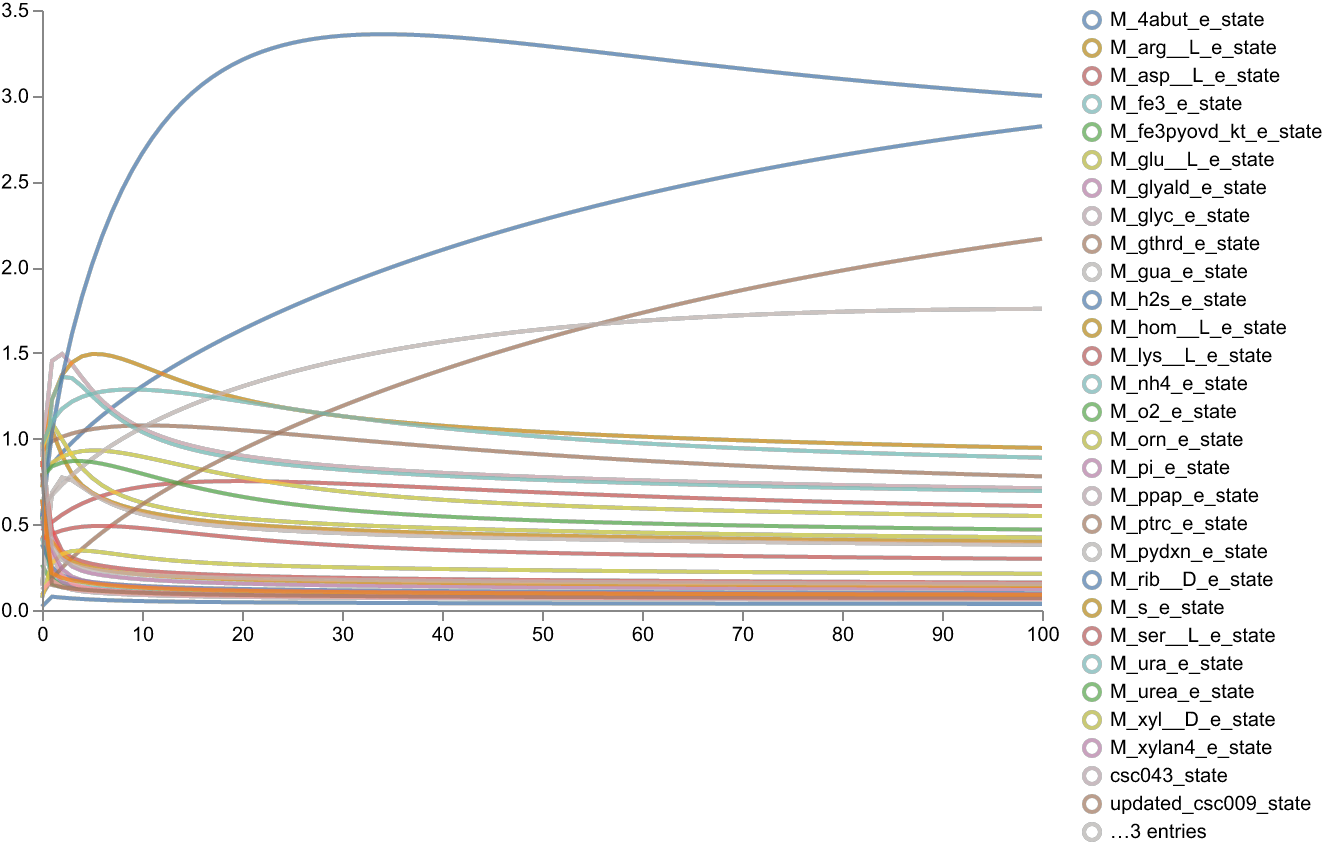

In [8]:
# Plot results for all states
schema = plots.trajectories(result1["data"], keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

### add Gaussian white noise to the simulated data

updated_csc031_state  M_arg__L_e_state  updated_csc009_state  \
Timestamp                                                                 
0                      1.001316          0.713693              0.800724   
1                      0.359388          1.044576              0.148377   
2                      0.294058          0.918991              0.127183   
3                      0.261837          0.800338              0.122841   
4                      0.262679          0.732149              0.105240   

           M_gua_e_state  M_h2s_e_state  M_hom__L_e_state  M_nh4_e_state  \
Timestamp                                                                  
0               0.165921       0.377748          0.841260       0.522022   
1               0.676960       0.251925          1.205504       1.228462   
2               0.782212       0.197880          1.375002       1.364598   
3               0.764303       0.169062          1.456144       1.348965   
4               0.706286       0.180289          1.480485       1.300486   

           M_orn_e_state  updated_csc040_state  M_4abut_e_state  ...  \
Timestamp                                                        ...   
0               0.936511              0.020524         0.764376  ...   
1               1.085543              0.076979         0.847724  ...   
2               0.984876              0.072695         0.908343  ...   
3               0.926930              0.076483         0.967141  ...   
4               0.805585              0.055648         1.049884  ...   

           csc043_state  M_xylan4_e_state  M_glyald_e_state  M_glyc_e_state  \
Timestamp                                                                     
0              0.116396          0.654147          0.794762        0.890048   
1              0.178611          0.369638          0.464272        1.438642   
2              0.134327          0.238080          0.329390        1.477614   
3              0.113763          0.197492          0.271037        1.434171   
4              0.115382          0.162685          0.237560        1.363521   

           M_rib__D_e_state  M_lys__L_e_state  M_o2_e_state  M_ura_e_state  \
Timestamp                                                                    
0                  0.548023          0.868228      0.547077       0.970781   
1                  1.041686          0.472534      0.190915       1.092315   
2                  1.364405          0.342069      0.139853       1.176052   
3                  1.610689          0.304066      0.122540       1.201739   
4                  1.812766          0.279479      0.133365       1.251199   

           M_xyl__D_e_state  M_ppap_e_state  
Timestamp                                    
0                  0.063872        0.565181  
1                  0.268652        0.314382  
2                  0.321829        0.209883  
3                  0.351454        0.164015  
4                  0.335608        0.134594  

[5 rows x 32 columns]

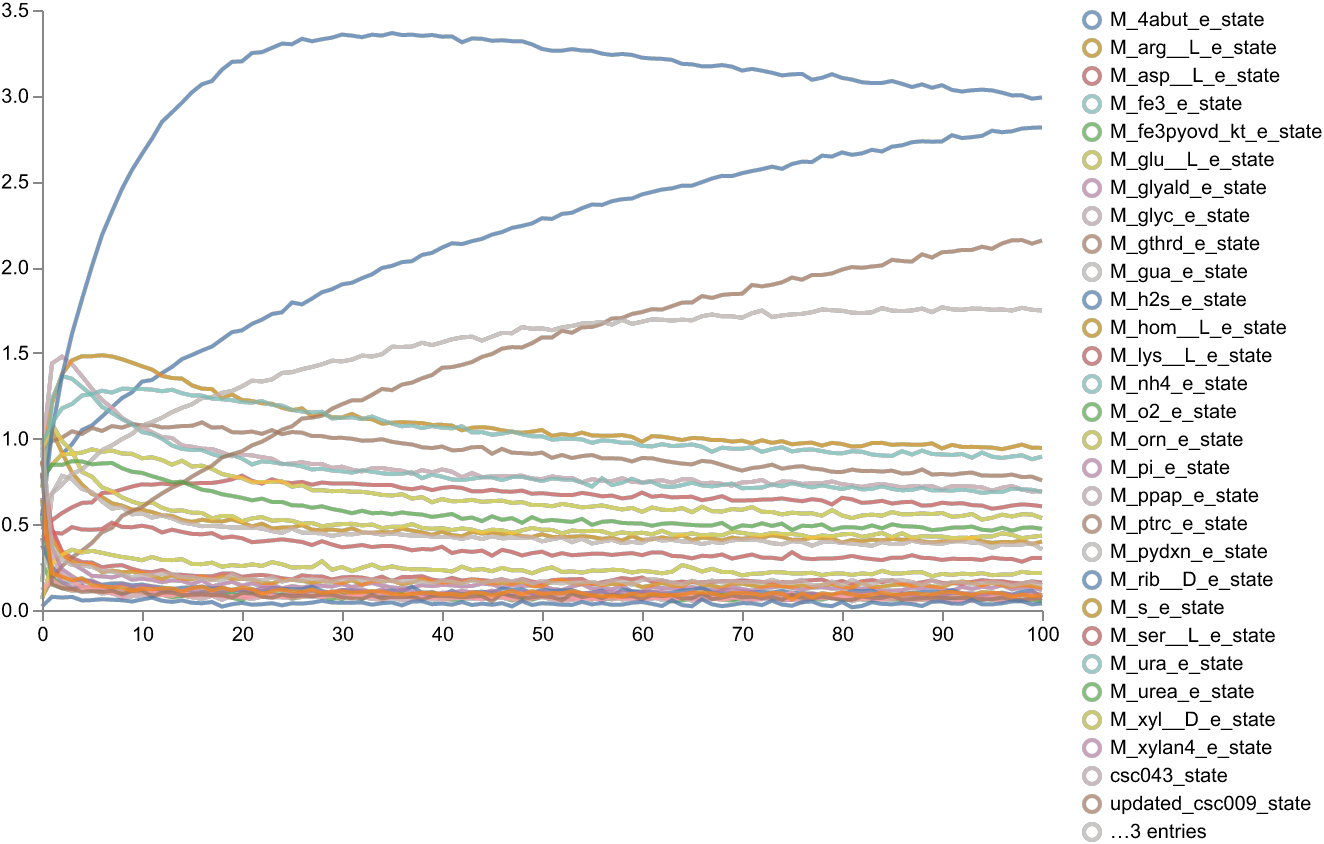

In [9]:
data = result1['data']

# Automatically identify state variable columns
state_columns = [col for col in data.columns if '_state' in col]

# Function to add Gaussian white noise to the state columns
def add_gaussian_noise(df, columns, mean=0, std=0.01):
    noisy_df = df.copy()
    for col in columns:
        noise = np.random.normal(mean, std, size=noisy_df[col].shape)
        noisy_df[col] += noise
    
    formatted_df = noisy_df[columns]
    formatted_df.index.names = ['Timestamp'] 
    return noisy_df[columns]

# Add noise to automatically identified state variables
noisy_data = add_gaussian_noise(data, state_columns, mean=0, std=0.01)
display(noisy_data.head())
schema = plots.trajectories(noisy_data, keep=".*_state")
plots.ipy_display(schema, dpi=150)


### visualize petri-net model

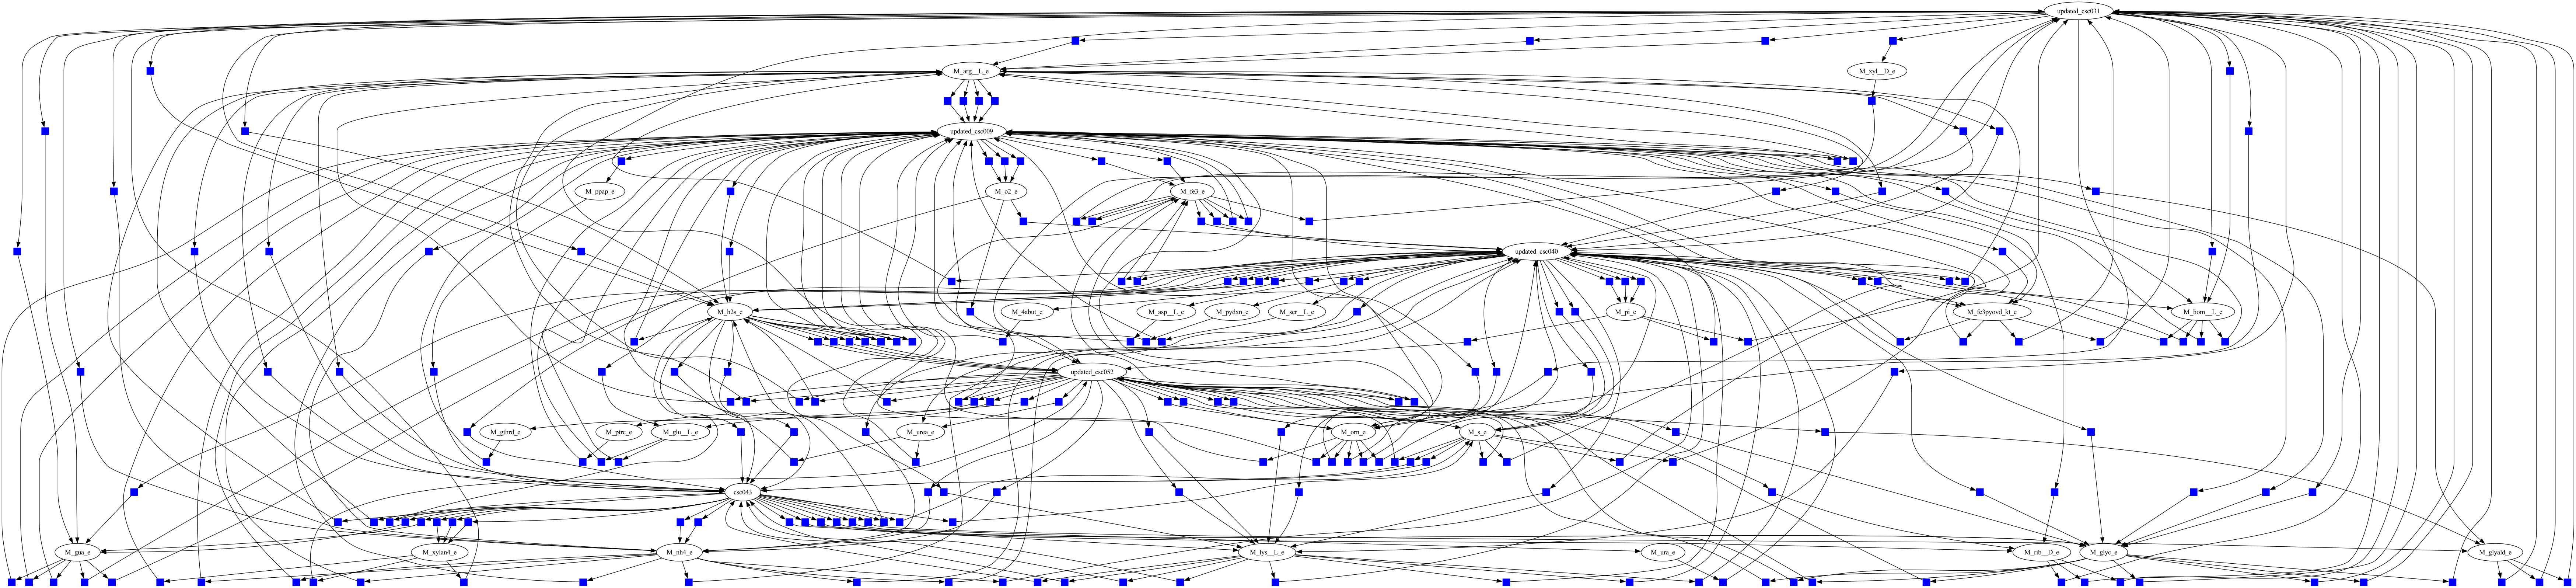

In [10]:
from mira.modeling.ode import OdeModel
from mira.modeling.viz import GraphicalModel

GraphicalModel.for_jupyter(smetana_model, width=500, unconfined=True)

### prior predictive sampling 
First assign priors to the model parameters (e.g., k values), then sample from the prior predictive distribution. 

In [11]:
## for priors

from mira.metamodel import Distribution


dist = Distribution(
                    type= "Uniform1",
                    parameters= {"minimum": 0.01,"maximum": 1.0 }     
                     )

for name,parameter in smetana_model.parameters.items():
    if name != "default_compartment":
        parameter.distribution = dist
    print(name,parameter, parameter.distribution)

parameter

k_d0 name='k_d0' display_name=None description='' identifiers={} context={} units=None value=0.333333333333333 distribution=Distribution(type='Uniform1', parameters={'minimum': 0.01, 'maximum': 1.0}) type='Uniform1' parameters={'minimum': 0.01, 'maximum': 1.0}
k_r0 name='k_r0' display_name=None description='' identifiers={} context={} units=None value=0.08 distribution=Distribution(type='Uniform1', parameters={'minimum': 0.01, 'maximum': 1.0}) type='Uniform1' parameters={'minimum': 0.01, 'maximum': 1.0}
k_d1 name='k_d1' display_name=None description='' identifiers={} context={} units=None value=0.333333333333333 distribution=Distribution(type='Uniform1', parameters={'minimum': 0.01, 'maximum': 1.0}) type='Uniform1' parameters={'minimum': 0.01, 'maximum': 1.0}
k_r1 name='k_r1' display_name=None description='' identifiers={} context={} units=None value=0.1 distribution=Distribution(type='Uniform1', parameters={'minimum': 0.01, 'maximum': 1.0}) type='Uniform1' parameters={'minimum': 0.01,

Parameter(name='default_compartment', display_name=None, description='', identifiers={}, context={}, units=None, value=1.0, distribution=None)

In [12]:
# set simulation and sampling parameters
start_time = 0.0
end_time = 100.0
logging_step_size = 1
num_samples = 10

result2 = pyciemss.sample(smetana_model, end_time, logging_step_size, num_samples, start_time=start_time)
display(result2["data"])

timepoint_id  sample_id timepoint_unknown  persistent_k_d0_param  \
0                0          0               0.0               0.362749   
1                1          0               1.0               0.362749   
2                2          0               2.0               0.362749   
3                3          0               3.0               0.362749   
4                4          0               4.0               0.362749   
...            ...        ...               ...                    ...   
1005            96          9              96.0               0.849126   
1006            97          9              97.0               0.849126   
1007            98          9              98.0               0.849126   
1008            99          9              99.0               0.849126   
1009           100          9             100.0               0.849126   

      persistent_k_r0_param  persistent_k_d1_param  persistent_k_r1_param  \
0                  0.083382               0.806140               0.495400   
1                  0.083382               0.806140               0.495400   
2                  0.083382               0.806140               0.495400   
3                  0.083382               0.806140               0.495400   
4                  0.083382               0.806140               0.495400   
...                     ...                    ...                    ...   
1005               0.770701               0.713656               0.122664   
1006               0.770701               0.713656               0.122664   
1007               0.770701               0.713656               0.122664   
1008               0.770701               0.713656               0.122664   
1009               0.770701               0.713656               0.122664   

      persistent_k_d2_param  persistent_k_r2_param  persistent_k_d3_param  \
0                  0.539577               0.787557               0.475018   
1                  0.539577               0.787557               0.475018   
2                  0.539577               0.787557               0.475018   
3                  0.539577               0.787557               0.475018   
4                  0.539577               0.787557               0.475018   
...                     ...                    ...                    ...   
1005               0.696128               0.359549               0.664761   
1006               0.696128               0.359549               0.664761   
1007               0.696128               0.359549               0.664761   
1008               0.696128               0.359549               0.664761   
1009               0.696128               0.359549               0.664761   

      ...  csc043_state  M_xylan4_e_state  M_glyald_e_state  M_glyc_e_state  \
0     ...      0.118274          0.639921          0.791725        0.891773   
1     ...      0.411427          0.490944          0.582724        0.491023   
2     ...      0.413728          0.464931          0.554268        0.475329   
3     ...      0.416852          0.462017          0.550931        0.475078   
4     ...      0.418066          0.462971          0.550332        0.474927   
...   ...           ...               ...               ...             ...   
1005  ...      0.431428          0.507848          0.585085        0.692881   
1006  ...      0.431419          0.507837          0.585074        0.692868   
1007  ...      0.431411          0.507828          0.585064        0.692856   
1008  ...      0.431405          0.507817          0.585053        0.692843   
1009  ...      0.431397          0.507810          0.585045        0.692833   

      M_rib__D_e_state  M_lys__L_e_state  M_o2_e_state  M_ura_e_state  \
0             0.544883          0.870012      0.548814       0.963663   
1             0.556695          0.598414      1.219486       0.634893   
2             0.555115          0.572996      1.467271       0.514662   
3             0.551416    

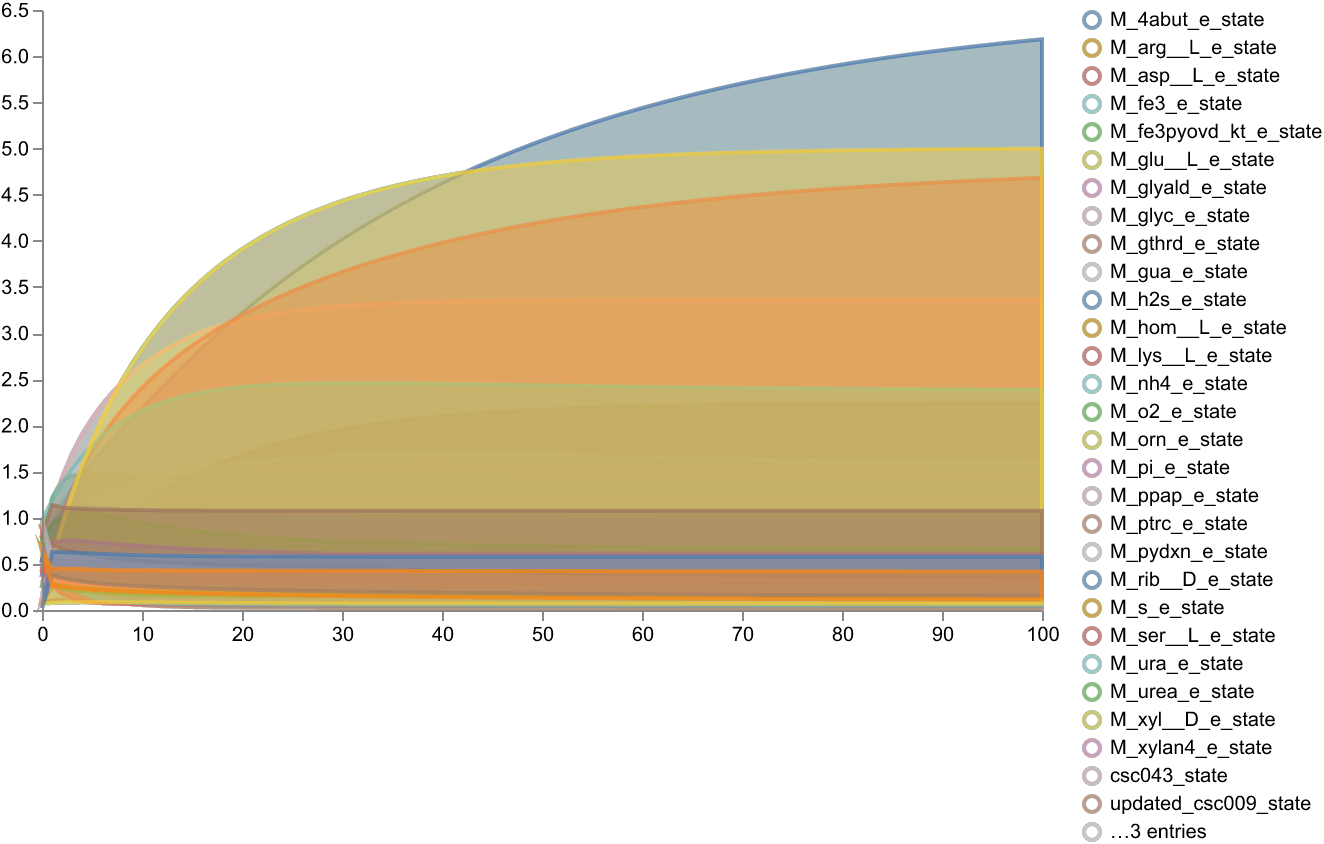

In [13]:
# Plot results for all states
schema = plots.trajectories(result2["data"], keep=".*_state")
#plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

### Calibrating the model on noisy simulated data

In [20]:
from mira.modeling.amr.petrinet import AMRPetriNetModel
from mira.modeling import Model

model_json_file_name = 'smetana_carbstor_mira_model_w_priors.json'
 
pm = AMRPetriNetModel(Model(smetana_model))
pm.to_json_file(
            model_json_file_name,
            name='smetana_carbstor_mira_model_w_priors',
            description="smetana_carbstor_mira_model_w_priors",
            indent=2,
        )

num_iterations = 25

data_path = 'example_carbstor_noisy_data.csv'
noisy_data.to_csv(data_path)
model_path_or_json = model_json_file_name


noisy_df = pd.read_csv(data_path)
column_to_initial_mapping = {}
for col in noisy_df.columns:
    param_name = col.replace('_state', '')
    if param_name in smetana_model.initials:
        column_to_initial_mapping[col] = param_name

# Printing the mapping
# for df_column, param in column_to_initial_mapping.items():
#     print(df_column, ' => ', param)


calibration_results = pyciemss.calibrate(model_path_or_json, data_path, data_mapping=column_to_initial_mapping, num_iterations=num_iterations, verbose=True)

/Users/geor228/Github/pyciemss/pyciemss/integration_utils/observation.py:49: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Data printout: This dataset contains 100 rows of data. The first column, Timestamp, begins at 0 and ends at 100. The subsequent columns are named: updated_csc031_state, M_arg__L_e_state, updated_csc009_state, M_gua_e_state, M_h2s_e_state, M_hom__L_e_state, M_nh4_e_state, M_orn_e_state, updated_csc040_state, M_4abut_e_state, M_asp__L_e_state, M_fe3_e_state, M_fe3pyovd_kt_e_state, M_glu__L_e_state, M_pi_e_state, M_pydxn_e_state, M_s_e_state, M_ser__L_e_state, M_urea_e_state, updated_csc052_state, M_gthrd_e_state, M_ptrc_e_state, csc043_state, M_xylan4_e_state, M_glyald_e_state, M_glyc_e_state, M_rib__D_e_state, M_lys__L_e_state, M_o2_e_state, M_ura_e_state, M_xyl__D_e_state, M_ppap_e_state
iteration 0: loss = 251971.30176657438


In [21]:
# Plot results for all states
# set simulation and sampling parameters
start_time = 0.0
end_time = 100.0
logging_step_size = 1
num_samples = 10

result3 = pyciemss.sample(smetana_model, end_time, logging_step_size, num_samples, start_time=start_time, inferred_parameters=calibration_results['inferred_parameters'])

display(result3["data"])


timepoint_id  sample_id timepoint_unknown  persistent_k_d0_param  \
0                0          0               0.0               0.543523   
1                1          0               1.0               0.543523   
2                2          0               2.0               0.543523   
3                3          0               3.0               0.543523   
4                4          0               4.0               0.543523   
...            ...        ...               ...                    ...   
1005            96          9              96.0               0.528798   
1006            97          9              97.0               0.528798   
1007            98          9              98.0               0.528798   
1008            99          9              99.0               0.528798   
1009           100          9             100.0               0.528798   

      persistent_k_r0_param  persistent_k_d1_param  persistent_k_r1_param  \
0                  0.767119               0.372405               0.747745   
1                  0.767119               0.372405               0.747745   
2                  0.767119               0.372405               0.747745   
3                  0.767119               0.372405               0.747745   
4                  0.767119               0.372405               0.747745   
...                     ...                    ...                    ...   
1005               0.813228               0.333450               0.722005   
1006               0.813228               0.333450               0.722005   
1007               0.813228               0.333450               0.722005   
1008               0.813228               0.333450               0.722005   
1009               0.813228               0.333450               0.722005   

      persistent_k_d2_param  persistent_k_r2_param  persistent_k_d3_param  \
0                  0.536738               0.626674               0.589846   
1                  0.536738               0.626674               0.589846   
2                  0.536738               0.626674               0.589846   
3                  0.536738               0.626674               0.589846   
4                  0.536738               0.626674               0.589846   
...                     ...                    ...                    ...   
1005               0.538310               0.609917               0.513235   
1006               0.538310               0.609917               0.513235   
1007               0.538310               0.609917               0.513235   
1008               0.538310               0.609917               0.513235   
1009               0.538310               0.609917               0.513235   

      ...  csc043_state  M_xylan4_e_state  M_glyald_e_state  M_glyc_e_state  \
0     ...      0.118274          0.639921          0.791725        0.891773   
1     ...      0.630514          0.509221          0.537780        0.648930   
2     ...      0.622550          0.494557          0.495671        0.630926   
3     ...      0.616613          0.488178          0.484848        0.623589   
4     ...      0.612440          0.484089          0.480518        0.619246   
...   ...           ...               ...               ...             ...   
1005  ...      0.606182          0.463108          0.545022        0.665958   
1006  ...      0.606182          0.463108          0.545022        0.665958   
1007  ...      0.606181          0.463108          0.545022        0.665958   
1008  ...      0.606182          0.463108          0.545022        0.665958   
1009  ...      0.606182          0.463108          0.545022        0.665958   

      M_rib__D_e_state  M_lys__L_e_state  M_o2_e_state  M_ura_e_state  \
0             0.544883          0.870012      0.548814       0.963663   
1             1.058685          0.551815      0.787249       0.846414   
2             1.211795          0.540503      0.801762       0.781999   
3             1.249259    

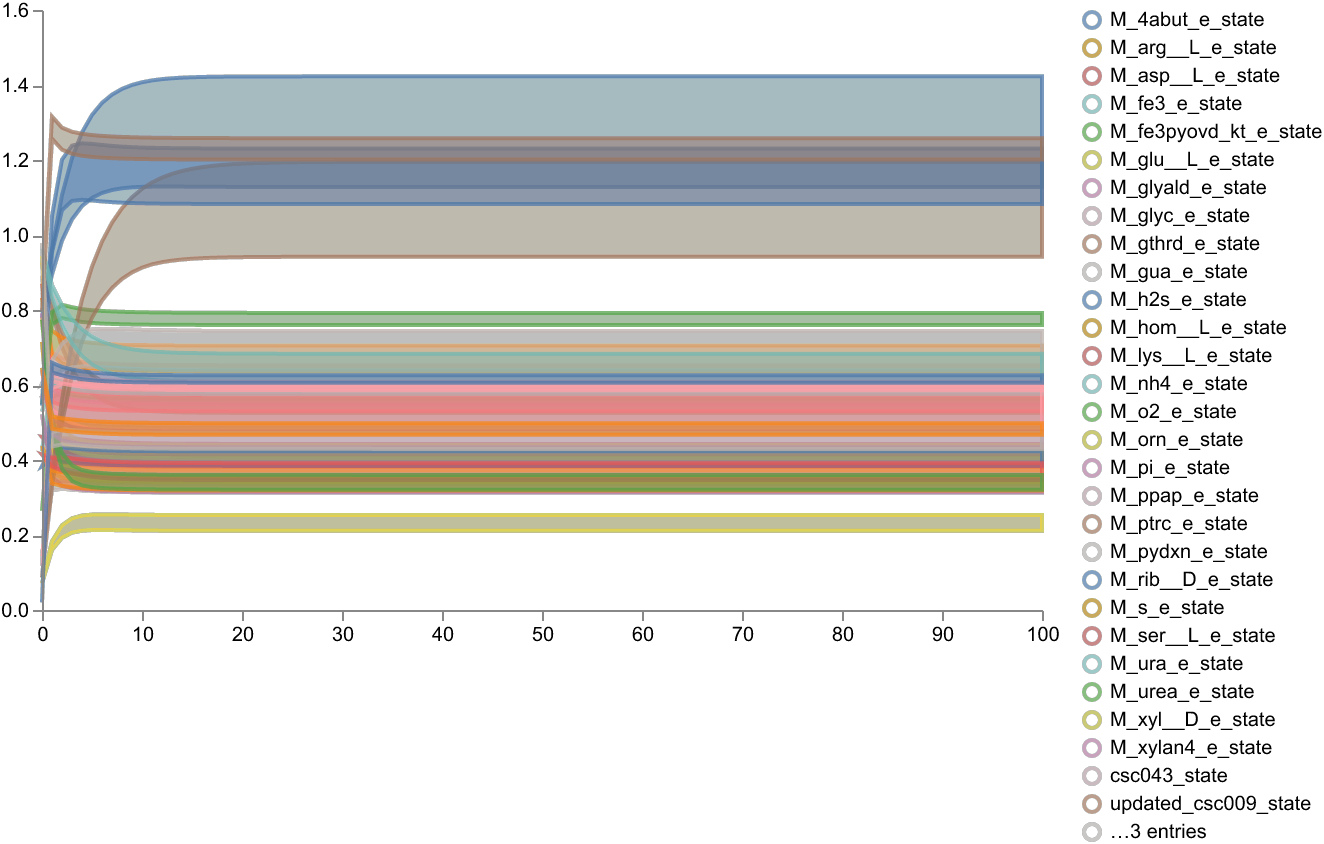

In [22]:
schema = plots.trajectories(result3["data"], keep=".*_state")
#plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

In [23]:
pre_calibration_df = result2["data"]
after_calibration_df = result3["data"]
observed_df = noisy_df

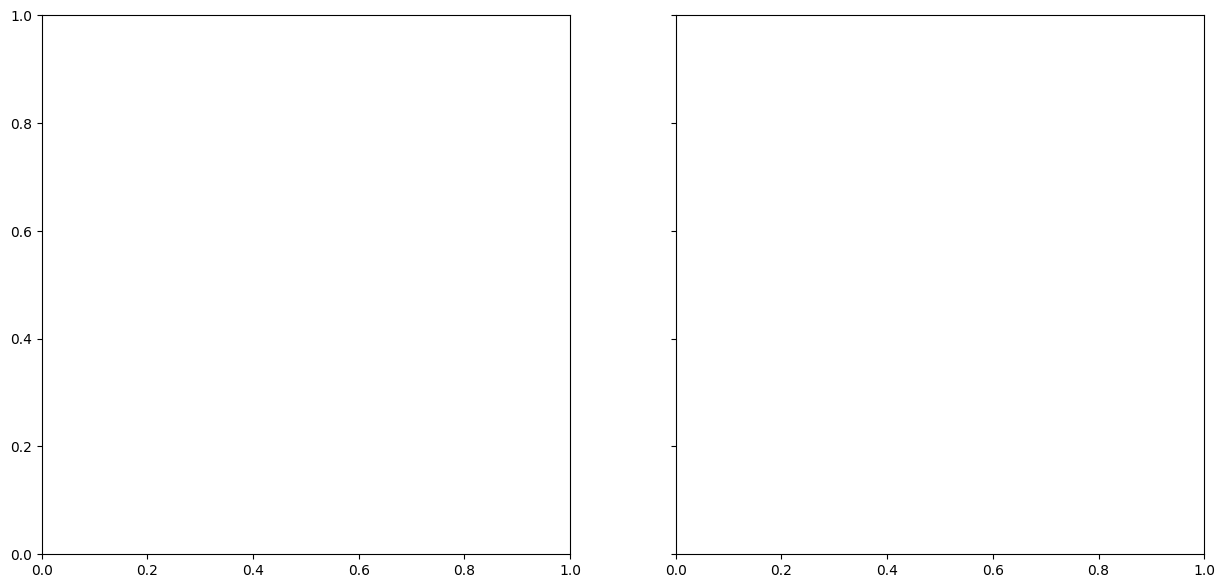

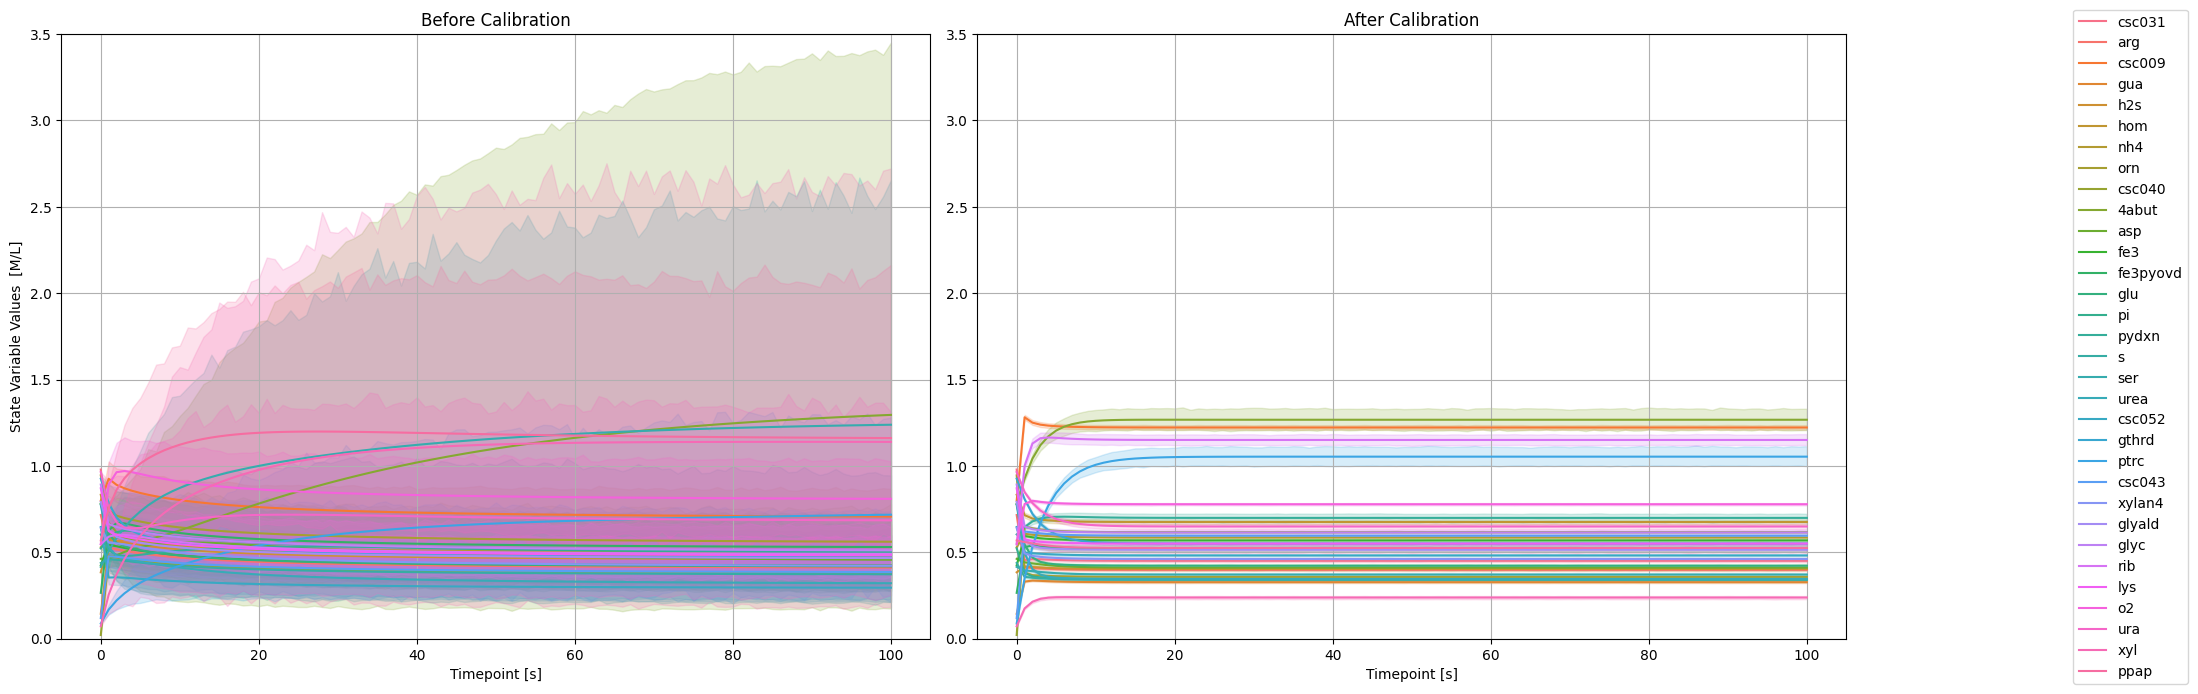

32

In [24]:
# comparison plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Label formatting function# Label formatting function
def clean_label(label):
    # Define a regex pattern to remove the unwanted parts
    label = re.sub(r'updated_|M_|_state|_e|_kt|__\w', '', label)  # Remove specific patterns
    return label.replace('_', ' ')  # Replace underscores with spaces for clarity

# Plot setup
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)


# Automatically identify state columns
state_columns = [col for col in pre_calibration_df.columns if '_state' in col]
###

# Plot setup with additional subplot for the legend
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7), gridspec_kw={'width_ratios': [1, 1, 0.1]})
palette = sns.color_palette("husl", len(state_columns))
# Pre-calibration data plot
for i, state_col in enumerate(state_columns):
    sns.lineplot(
        data=pre_calibration_df,
        x='timepoint_id',
        y=state_col,
        ax=axes[0],
        label=clean_label(state_col),
        color=palette[i]  # Assign unique color
    )

axes[0].set_title('Before Calibration')
axes[0].set_xlabel('Timepoint [s]')
axes[0].set_ylabel('State Variable Values  [M/L]')
axes[0].grid(True)
axes[0].legend().set_visible(False)  # Turn off the legend for this axis

# Post-calibration data plot
for i, state_col in enumerate(state_columns):
    sns.lineplot(
        data=after_calibration_df,
        x='timepoint_id',
        y=state_col,
        ax=axes[1],
        label=clean_label(state_col),
        color=palette[i]  # Assign unique color
    )

axes[1].set_title('After Calibration')
axes[1].set_ylabel('')
axes[1].set_xlabel('Timepoint [s]')
axes[1].grid(True)
axes[1].legend().set_visible(False)  # Turn off the legend for this axis


# Share the x and y limits
axes[1].set_xlim(axes[0].get_xlim())
#axes[1].set_ylim(axes[0].get_ylim())

# Adjust y limits based on 'after calibration' data
#y_min, y_max = axes[1].get_ylim()
y_lim = (0,3.5)
axes[0].set_ylim(y_lim)
axes[1].set_ylim(y_lim)

# Remove the third subplot for the legend
axes[2].axis('off')

# Create a single legend on the right subplot
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()

display(len(state_columns))

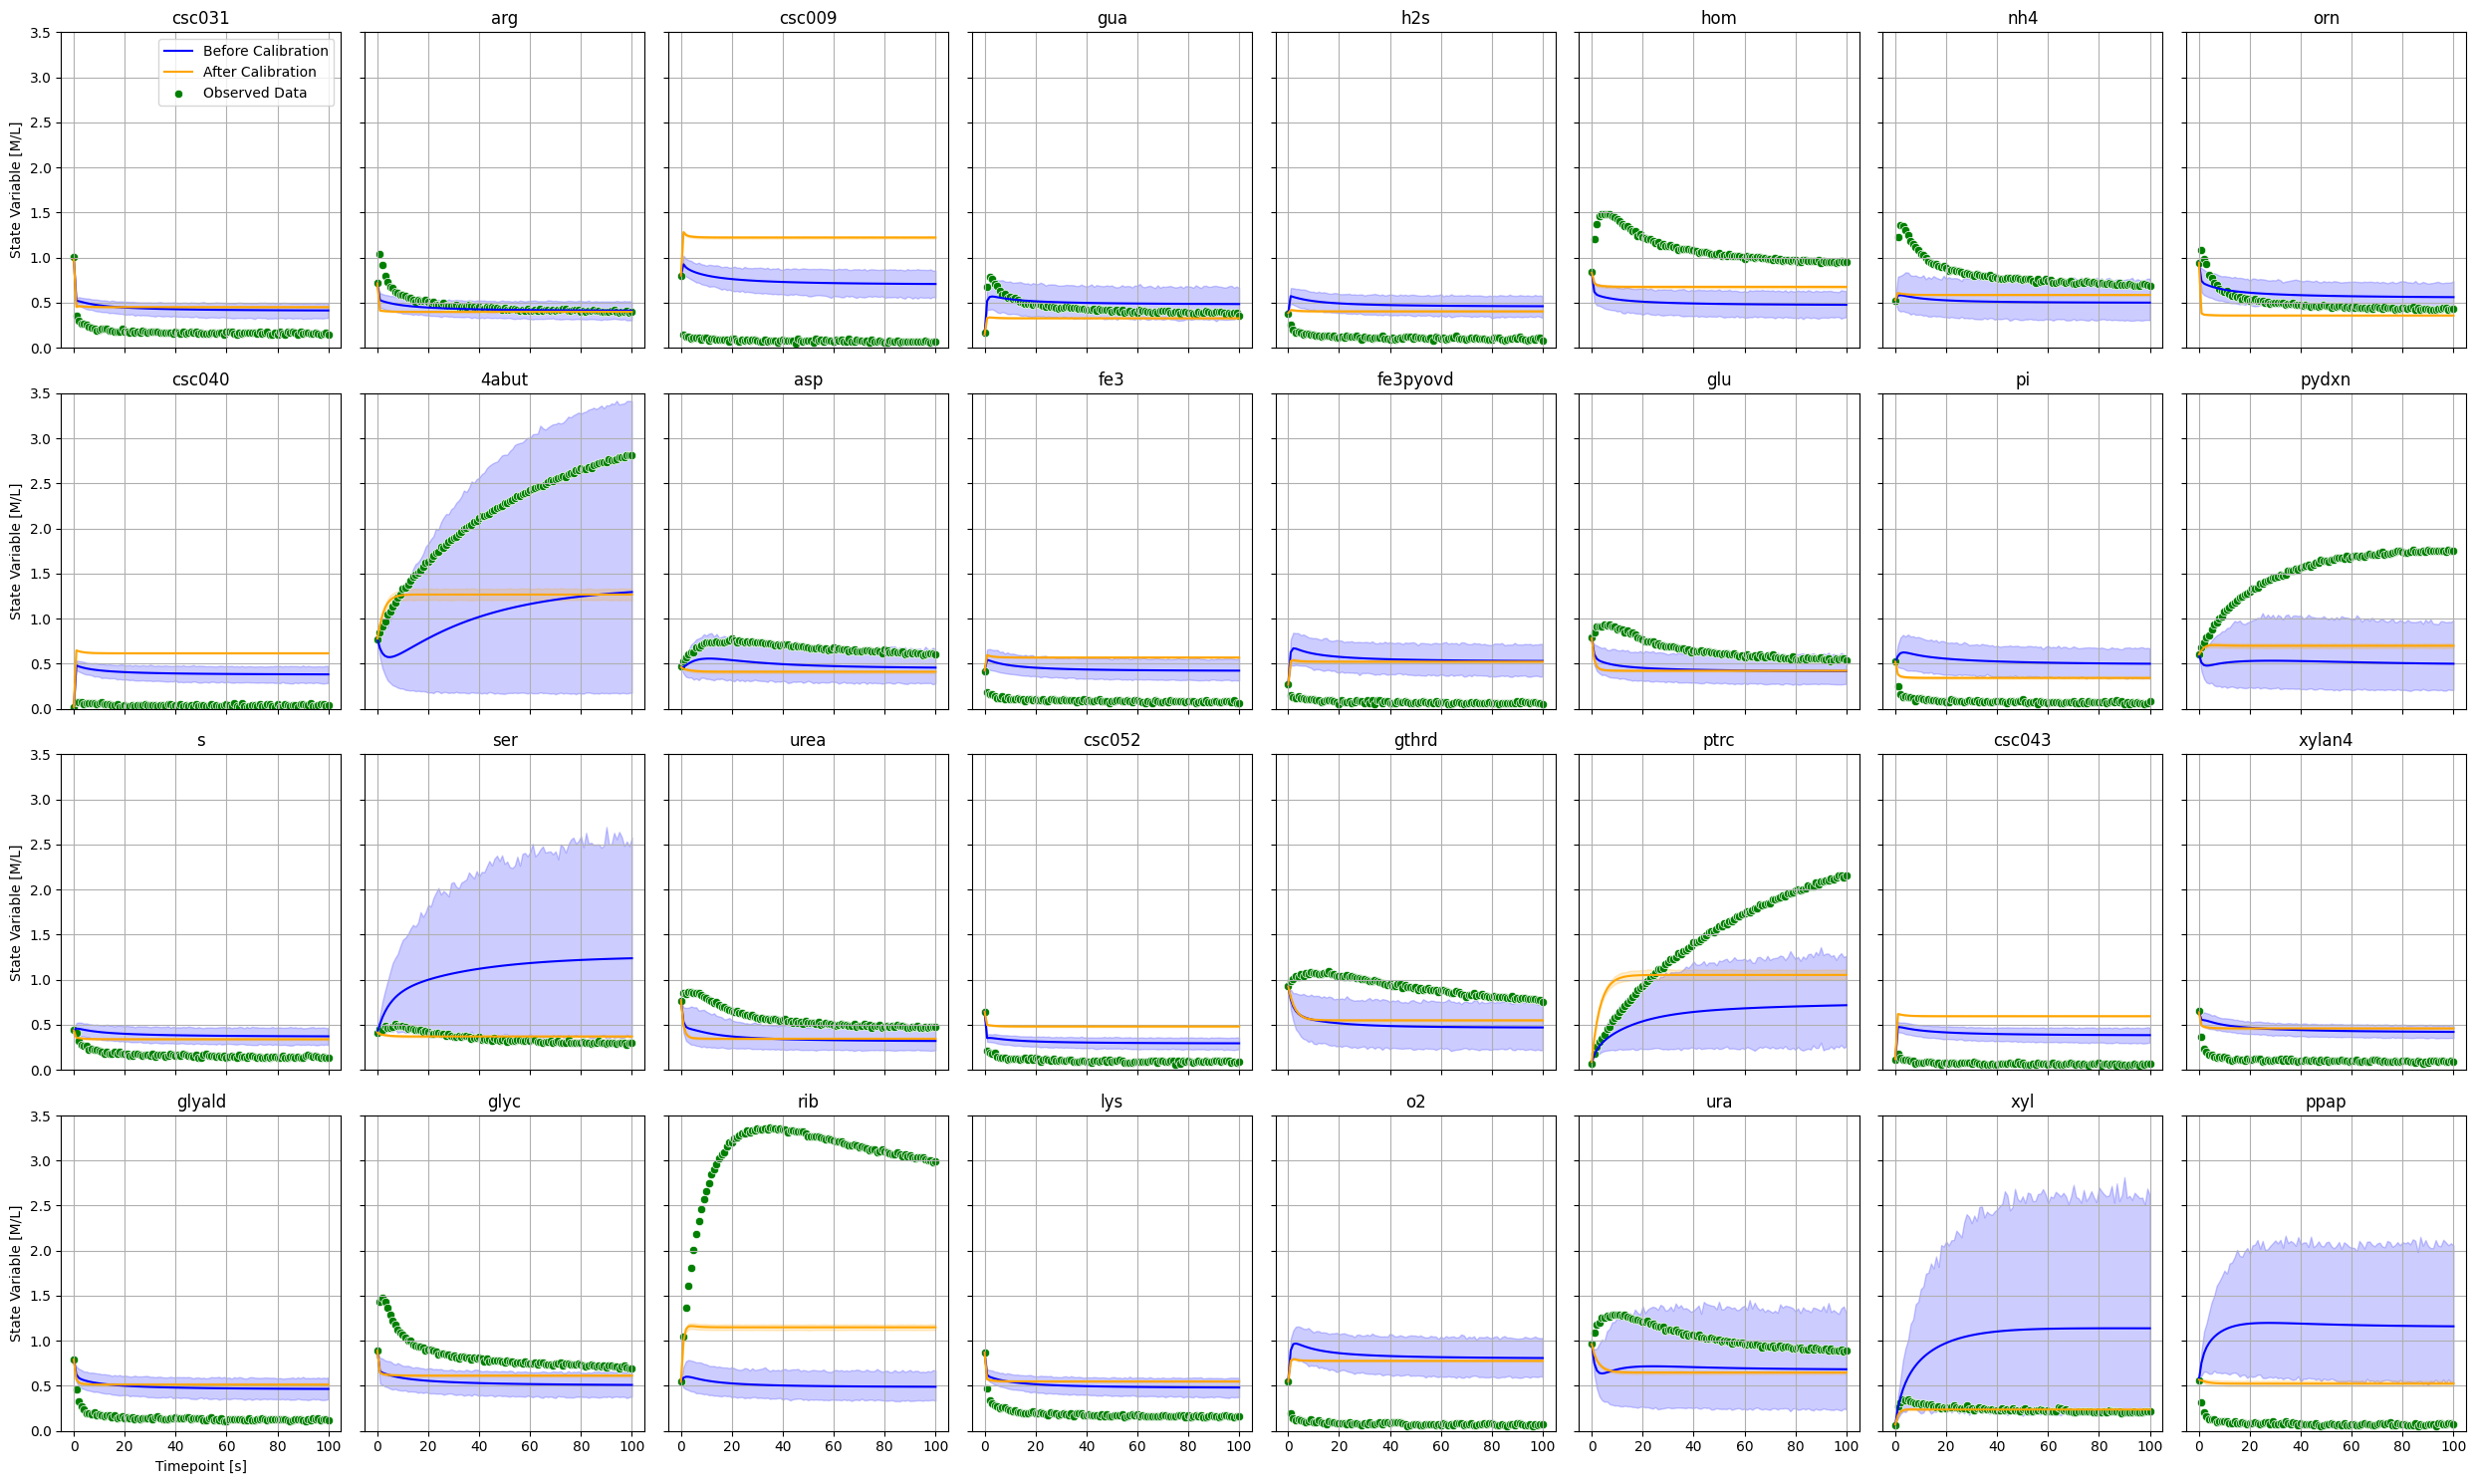

In [25]:
observed_df.rename(columns={'Timestamp': 'timepoint_id'}, inplace=True)

# Automatically identify state columns
state_columns = [col for col in pre_calibration_df.columns if '_state' in col]

# Define colors for pre-calibration, post-calibration, and observed data
color_pre = 'blue'
color_post = 'orange'
color_observed = 'green'

# Plot setup, 4-row x 8-column grid for 32 variables
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(25, 15), sharex=True, sharey=True)

for i, state_col in enumerate(state_columns):
    ax = axes[i // 8, i % 8]
    
    # Pre-calibration data plot
    sns.lineplot(
        data=pre_calibration_df,
        x='timepoint_id',
        y=state_col,
        ax=ax,
        label='Before Calibration' if i == 0 else "",  # Label only for the first plot
        color=color_pre
    )
    
    # Post-calibration data plot
    sns.lineplot(
        data=after_calibration_df,
        x='timepoint_id',
        y=state_col,
        ax=ax,
        label='After Calibration' if i == 0 else "",  # Label only for the first plot
        color=color_post
    )
    
    # Observed data plot
    sns.scatterplot(
        data=observed_df,
        x='timepoint_id',
        y=state_col,
        ax=ax,
        label='Observed Data' if i == 0 else "",  # Label only for the first plot
        color=color_observed,
        marker='o'
    )
    
    ax.set_title(clean_label(state_col))
    
    # Set x labels only for the bottom left subplot
    if i // 8 == 3 and i % 8 == 0:
        ax.set_xlabel('Timepoint [s]')
    else:
        ax.set_xlabel('')
    
    # Set y labels only for the leftmost column
    if i % 8 == 0:
        ax.set_ylabel('State Variable [M/L]')
    else:
        ax.set_ylabel('')
    
    ax.grid(True)

# Adjust y limits based on 'after calibration' data
y_lim = (0, 3.5)
for ax in axes.flatten():
    ax.set_ylim(y_lim)

# Create a single legend for only the first subplot (axes[0, 0])
handles, labels = axes[0, 0].get_legend_handles_labels()
axes[0, 0].legend(handles, labels, loc='best')

plt.tight_layout()
plt.show()



### simulating data

In [ ]:
smetana_carbstor_sbml_file = './smetana_carbstor_consumer_resource_corrected.xml'
rr_model = te.loadSBMLModel(smetana_carbstor_sbml_file)

all_species = rr_model.getFloatingSpeciesIds()
species_wo_metabolites = [s for s in all_species if not s.startswith('M')]

print(f'The model contains {len(species_wo_metabolites)} donor and receiver species and {len(all_species)-len(species_wo_metabolites)} metabolite compounds.')


In [ ]:
def create_custom_time_vector(num_points_initial, num_points_steady, t_initial_end=100, t_total_end=500):
    """Create a custom time vector with specified number of points"""
    initial_phase = np.linspace(0, t_initial_end, num_points_initial, endpoint=False)
    steady_phase = np.linspace(t_initial_end, t_total_end, num_points_steady)
    time_vector = np.concatenate((initial_phase, steady_phase))
    return time_vector


time_points_6 = create_custom_time_vector(3, 3, 50, 500)
time_points_12 = create_custom_time_vector(6, 6, 50, 500)
time_points_9 = create_custom_time_vector(6, 3, 50, 500)

print(f"Time vector with 6 points: {time_points_6}")
print(f"Time vector with 12 points: {time_points_12}")
print(f"Time vector with 12 points: {time_points_9}")

In [ ]:

# simulate and plot
results1 = rr_model.simulate(times=time_points_6)
rr_model.plot(title='6 datapoints: all species concentration vs time', figsize=(15, 8))
rr_model.resetToOrigin()

results2 = rr_model.simulate(times=time_points_12)
rr_model.plot(title='12 datapoints: all species concentration vs time', figsize=(15, 8))
rr_model.resetToOrigin()

results3 = rr_model.simulate(times=time_points_9)
rr_model.plot(title='9 datapoints: all species concentration vs time', figsize=(15, 8))
rr_model.resetToOrigin()

In [25]:

def format_and_save_road_runner_results(fname, rr_results, obs_mets=True):
    formatted_df = pd.DataFrame(rr_results, columns=rr_results.colnames)
    if not obs_mets:
        formatted_df = formatted_df.loc[:, ~formatted_df.columns.str.startswith('[M')]
    formatted_df = formatted_df.set_index('time')
    formatted_df.index.names = ['Timestamp']  # must be 'Timestamp' for pyciemss
    formatted_df.to_csv(fname)
    return formatted_df

In [ ]:
# all observations (incl. metabolites), 6 time points
all_obs_6_measurements_data_file_path = 'simulated_data_w_mets_6_measurements.csv'
all_obs_6_measurements = format_and_save_road_runner_results(all_obs_6_measurements_data_file_path,results1, obs_mets=True )
all_obs_6_measurements.head()

In [ ]:
# no metabolite observations, 6 time points
no_mets_6_measurements_data_file_path = 'simulated_data_no_mets_6_measurements.csv'
no_mets_6_measurements = format_and_save_road_runner_results(no_mets_6_measurements_data_file_path, results1, obs_mets=False)
no_mets_6_measurements.head()


In [ ]:
# all observations (incl. metabolites), 12 time points
all_obs_12_measurements_data_file_path = 'simulated_data_w_mets_12_measurements.csv'
all_obs_12_measurements = format_and_save_road_runner_results(all_obs_12_measurements_data_file_path, results2, obs_mets=True)
all_obs_12_measurements.head()

In [ ]:
# no metabolite observations, 12 time points
no_mets_12_measurements_data_file_path = 'simulated_data_no_mets_12_measurements.csv'
no_mets_12_measurements = format_and_save_road_runner_results(no_mets_12_measurements_data_file_path, results2, obs_mets=False)
no_mets_12_measurements.head()

In [ ]:
# all observations (incl. metabolites), 9 time points
all_obs_9_measurements_data_file_path = 'simulated_data_w_mets_9_measurements.csv'
all_obs_9_measurements = format_and_save_road_runner_results(all_obs_9_measurements_data_file_path,results3, obs_mets=True )
all_obs_9_measurements.head()

In [ ]:
# no metabolites measured, 9 time points
no_mets_9_measurements_data_file_path = 'simulated_data_no_mets_9_measurements.csv'
no_mets_9_measurements = format_and_save_road_runner_results(no_mets_9_measurements_data_file_path,results3, obs_mets=False )
no_mets_9_measurements.head()

### calibration

- assign priors (if needed)
- save as AMRPetriNet (JSON) file
- run calibration

In [ ]:
smetana_carbstor_mira_model = template_model_from_sbml_file(smetana_carbstor_sbml_file)

## for priors use uniform(0,1)

from mira.metamodel import Distribution


dist = Distribution(
                    type= "Uniform1",
                    parameters= {"minimum": 0.1,"maximum": 1.0 }     
                     )

for name,parameter in smetana_carbstor_mira_model.parameters.items():
    if name != "default_compartment":
        parameter.distribution = dist

parameter

In [31]:
from mira.modeling.amr.petrinet import AMRPetriNetModel
from mira.modeling import Model

model_json_file_name = 'smetana_carbstor_mira_model_w_priors.json'
 
pm = AMRPetriNetModel(Model(smetana_carbstor_mira_model))
pm.to_json_file(
            model_json_file_name,
            name='smetana_carbstor_mira_model_w_priors',
            description="smetana_carbstor_mira_model_w_priors",
            indent=2,
        )



In [ ]:
num_iterations = 100
data_to_use = all_obs_9_measurements
data_path = all_obs_9_measurements
model_path_or_json = model_json_file_name

data_mapping = {k:k.strip("[]") for k in data_to_use.columns}  # remove '[]' for concentration added by Tellurium
calibration_results = pyciemss.calibrate(model_path_or_json, data_path, data_mapping=data_mapping, num_iterations=num_iterations, verbose=True)

In [ ]:
calibration_results

In [ ]:
parameter_estimates = calibration_results["inferred_parameters"]
parameter_estimates()

In [ ]:
# set simulation and sampling parameters
start_time = 0.0
end_time = 500.0
logging_step_size = 1	#1.0
num_samples = 100

calibrated_sample_results = pyciemss.sample(smetana_carbstor_mira_model, end_time, logging_step_size, num_samples, 
                start_time=start_time, inferred_parameters=parameter_estimates)
display(calibrated_sample_results["data"].head())


In [ ]:
calibrated_sample_results.keys()
calibrated_sample_results['unprocessed_result'].keys()

In [ ]:
# Plot results for all states
schema = plots.trajectories(calibrated_sample_results["data"], keep=".*_state")
#plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

In [ ]:
# get ground truths (for simulated data)
import json
# Load the JSON file
with open(model_path_or_json, 'r') as f:
    json_data = json.load(f)

# Extract the parameter ground truth values
parameters_info = json_data['semantics']['ode']['parameters']
ground_truth = {param['id']: param['value'] for param in parameters_info}

# Function to clean parameter names by removing "persistent_" prefix
def clean_param_name(param_name):
    return param_name.replace("persistent_", "")

ground_truth

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


# Extract the unprocessed results (parameter estimates)
unprocessed_result = calibrated_sample_results['unprocessed_result']

# Isolate only 1-dimensional tensors (parameters) and clean parameter names
parameters_data = {clean_param_name(k): v.numpy() for k, v in unprocessed_result.items() if v.ndim == 1}

if not parameters_data:
    print("No parameters found in the unprocessed results.")
else:
    # Convert to Pandas DataFrame
    parameters_df = pd.DataFrame(parameters_data)
    
    if parameters_df.empty:
        print("The parameters DataFrame is empty.")
    else:
        # Plotting in multiple subplots to avoid overcrowding
        num_parameters = len(parameters_df.columns)
        num_rows = math.ceil(num_parameters / 5)  # Adjust the number of columns per row
        fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, num_rows * 5), sharex=True)
        
        # Flatten the axes for easy indexing
        axes = axes.flatten()
        
        for i, column in enumerate(parameters_df.columns):
            sns.kdeplot(parameters_df[column], ax=axes[i], fill=True)
            # Plotting the ground truth value as a vertical line
            if column in ground_truth:
                axes[i].axvline(ground_truth[column], color='red', linestyle='--', label=f'Ground Truth: {ground_truth[column]}')
                axes[i].legend()
            axes[i].set_title(column)
        
        # Hide any unused subplots
        for i in range(num_parameters, len(axes)):
            fig.delaxes(axes[i])
        
        plt.tight_layout()
        plt.show()



In [ ]:
# set simulation and sampling parameters
start_time = 0.0
end_time = 500.0
logging_step_size = 1	#1.0
num_samples = 100

prior_predictive_sample_results = pyciemss.sample(smetana_carbstor_mira_model, end_time, logging_step_size, num_samples, 
                start_time=start_time)
display(prior_predictive_sample_results["data"].head())

In [ ]:
# Plot results for all states
schema = plots.trajectories(prior_predictive_sample_results["data"], keep=".*_state")
#plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

# model for calcium carbonate ($\mathrm{CaCO_3}$) precipitation
ref: https://www.mdpi.com/2076-3417/14/7/2854 (eqns 1-6)



see also: https://pubmed.ncbi.nlm.nih.gov/1857197/, https://pubmed.ncbi.nlm.nih.gov/1857197/ (for enzymatic reactions)



## Calculation of Molarity of Calcium in Solution

### Problem Statement:
To find the molarity (mol/L) of calcium in a solution where 20 grams of $\text{CaCl}_2 \cdot 2\text{H}_2\text{O}$ is dissolved in 1 liter of water.

### Step-by-Step Calculation:

1. **Molar Mass of $\text{CaCl}_2 \cdot 2\text{H}_2\text{O}$**:
   - Calculate the molar mass of calcium chloride dihydrate:
     - Calcium (Ca): $1 \times 40.08 \, \text{g/mol} = 40.08 \, \text{g/mol}$
     - Chlorine (Cl): $2 \times 35.45 \, \text{g/mol} = 70.90 \, \text{g/mol}$
     - Water (H₂O): $2 \times 18.02 \, \text{g/mol} = 36.04 \, \text{g/mol}$
     - Total molar mass: $40.08 + 70.90 + 36.04 = 147.02 \, \text{g/mol}$

2. **Convert Grams to Moles**:
   - Use the molar mass to convert the mass of $\text{CaCl}_2 \cdot 2\text{H}_2\text{O}$ to moles:
     $$
     \text{moles of } \text{CaCl}_2 \cdot 2\text{H}_2\text{O} = \frac{20 \, \text{g}}{147.02 \, \text{g/mol}} \approx 0.136 \, \text{mol}
     $$

3. **Determine Molarity of Calcium**:
   - Since the solution volume is 1 liter, the molarity of $\text{CaCl}_2 \cdot 2\text{H}_2\text{O}$ is:
     $$
     \text{Molarity of } \text{CaCl}_2 \cdot 2\text{H}_2\text{O} = \frac{0.136 \, \text{mol}}{1 \, \text{L}} = 0.136 \, \text{M}
     $$

4. **Calcium Ion Contribution**:
   - Each formula unit of $\text{CaCl}_2 \cdot 2\text{H}_2\text{O}$ dissociates to give 1 calcium ion ($\text{Ca}^{2+}$) and 2 chloride ions ($\text{Cl}^-$) in solution.
   - Therefore, the molarity of calcium ions ($\text{Ca}^{2+}$) is the same as the molarity of $\text{CaCl}_2 \cdot 2\text{H}_2\text{O}$:
     $$
     \text{Molarity of } \text{Ca}^{2+} = 0.136 \, \text{M}
     $$

### Conclusion:

The molarity of calcium ($\text{Ca}^{2+}$) in the solution is $0.136 \, \text{M}$.



2% CaCl2-2H2O	20 g

## Calculation of Molarity of Urea in Solution

### Problem Statement:
To find the molarity (mol/L) of urea ($\text{CO(NH}_2\text{)}_2$) in a solution where 20 grams of urea is dissolved in 1 liter of water.

### Step-by-Step Calculation:

1. **Molar Mass of Urea**:
   - Calculate the molar mass of urea:
     - Carbon (C): $1 \times 12.01 \, \text{g/mol} = 12.01 \, \text{g/mol}$
     - Oxygen (O): $1 \times 16.00 \, \text{g/mol} = 16.00 \, \text{g/mol}$
     - Nitrogen (N): $2 \times 14.01 \, \text{g/mol} = 28.02 \, \text{g/mol}$
     - Hydrogen (H): $4 \times 1.01 \, \text{g/mol} = 4.04 \, \text{g/mol}$
     - Total molar mass: $12.01 + 16.00 + 28.02 + 4.04 = 60.07 \, \text{g/mol}$

2. **Convert Grams to Moles**:
   - Use the molar mass to convert the mass of urea to moles:
     $$
     \text{moles of urea} = \frac{20 \, \text{g}}{60.07 \, \text{g/mol}} \approx 0.333 \, \text{mol}
     $$

3. **Determine Molarity**:
   - Since the solution volume is 1 liter, the molarity of urea is:
     $$
     \text{Molarity of urea} = \frac{0.333 \, \text{mol}}{1 \, \text{L}} = 0.333 \, \text{M}
     $$

### Conclusion:

The molarity of urea ($\text{CO(NH}_2\text{)}_2$) in the solution is $0.333 \, \text{M}$.

## Calculation of Atmospheric Carbon Dioxide Concentration in Moles per Liter

### Problem Statement:
To find the concentration of atmospheric carbon dioxide ($\text{CO}_2$) in moles per liter (molarity).

### Step-by-Step Calculation:

1. **Partial Pressure of $\text{CO}_2$**:
   - Atmospheric $\text{CO}_2$ concentration is typically around 400 parts per million (ppm).
   - This means that $\text{CO}_2$ constitutes $0.04\%$ of the total atmospheric pressure.
   - Assuming standard atmospheric pressure is 1 atmosphere (atm), the partial pressure of $\text{CO}_2$ is:
     $$
     P_{\text{CO}_2} = 0.04\% \times 1 \, \text{atm} = 0.0004 \, \text{atm}
     $$

2. **Ideal Gas Law**:
   - The ideal gas law is given by:
     $$
     PV = nRT
     $$
   - Where:
     - $P$ = pressure in atm
     - $V$ = volume in liters
     - $n$ = number of moles
     - $R$ = ideal gas constant $= 0.0821 \, \text{L} \cdot \text{atm}/(K\cdot mol)$
     - $T$ = temperature in Kelvin (K)
   - Rearranging to solve for molarity (moles per liter):
     $$
     \frac{n}{V} = \frac{P}{RT}
     $$

3. **Assumptions**:
   - Standard temperature $T = 298 \, \text{K}$ (25°C)

4. **Calculation**:
   - Using the values:
     $$
     P_{\text{CO}_2} = 0.0004 \, \text{atm}
     $$
     $$
     R = 0.0821 \, \text{L} \cdot \text{atm}/(K\cdot mol)
     $$
     $$
     T = 298 \, \text{K}
     $$
   - Plugging in these values:
     $$
     \frac{n}{V} = \frac{0.0004 \, \text{atm}}{0.0821 \, \text{L} \cdot \text{atm}/(K\cdot mol)} \times 298 \, \text{K}
     $$
     $$
     \frac{n}{V} = \frac{0.0004}{24.45} \, \text{mol/L}
     $$
     $$
     \frac{n}{V} \approx 1.64 \times 10^{-5} \, \text{mol/L}
     $$

### Conclusion:

The concentration of atmospheric carbon dioxide is approximately $1.64 \times 10^{-5}$ moles per liter (M).
 

# model for calcium carbonate ($\mathrm{CaCO_3}$) precipitation

...
<!-- see: https://www.frontiersin.org/journals/materials/articles/10.3389/fmats.2019.00126/full (eqns 1-7 and figure 4)

$$\begin{array}{rcl}
 \text{CO(NH}_2\text{)}_2 + \text{H}_2 &\rightarrow& \text{NH}_2\text{COOH} + \text{NH}_3  \\
 \text{NH}_2\text{COOH} + \text{H}_2\text{O} &\rightarrow& \text{NH}_3 + \text{H}_2\text{CO}_3  \\
 \text{H}_2\text{CO}_3 &\leftrightarrow& \text{HCO}_3^- + \text{H}^+  \\
 \text{NH}_3 + 2\text{H}_2\text{O} &\rightarrow& 2\text{NH}_4^+ + 2\text{OH}^-  \\
 \text{HCO}_3^- + \text{H}^+ + 2\text{NH}_4^+ + 2\text{OH}^- &\rightarrow& \text{CO}_2^- + 2\text{NH}_4^+ + 2\text{H}_2\text{O}  \\
 \text{Ca}^{2+} + \text{Cell} &\rightarrow& \text{Cell}-\text{Ca}^{2+}  \\
 \text{Cell}-\text{Ca}^{2+} + \text{CO}_3^{2-} &\rightarrow& \text{Cell}-\text{CaCO}_3 
\end{array}$$
 
 note: pH + pOH = 14, so we should enforce that constraint on the model  -->

$$
\begin{array}{rl}
\text{Reaction\ 1:\ Ureolysis} & \text{urea} + \text{H}_2\text{O} \rightarrow 2 \text{NH}_3 + \text{CO}_2 \\
& \text{Rate:} \quad \frac{V_{\max_{\text{urease}}} [\text{urea}]}{K_{m_{\text{urease}}} + [\text{urea}]} \quad \text{(water in excess and fixed, Michaelis-Menten)} \\ \\
\text{Reaction\ 2:\ Protonation\ of\ Ammonia} & 2 \text{NH}_3 + 2 \text{H}_2\text{O} \rightarrow 2 \text{NH}_4^+ + 2 \text{OH}^- \\
& \text{Rate:} \quad k_{2f} [\text{NH}_3]^2 [\text{H}_2\text{O}]^2 - k_{2r} [\text{NH}_4^+]^2 [\text{OH}^-]^2 \\ \\
\text{Reaction\ 3:\ CO}_2\text{\ Hydrolysis} & \text{CO}_2 + \text{H}_2\text{O} \rightarrow \text{H}_2\text{CO}_3 \\
& \text{Rate:} \quad \frac{K_{\text{cat}_{\text{CA}}} [\text{CA}_{\text{conc}}] [\text{CO}_2]}{K_{m_{\text{CA}}} + [\text{CO}_2]} \quad \text{(Michaelis-Menten)} \\ \\
\text{Reaction\ 4:\ Dissociation\ of\ Carbonic\ Acid} & \text{H}_2\text{CO}_3 + \text{OH}^- \rightarrow \text{HCO}_3^- + \text{H}_2\text{O} \\
& \text{Rate:} \quad k_{4f} [\text{H}_2\text{CO}_3] [\text{OH}^-] - k_{4r} [\text{HCO}_3^-] [\text{H}_2\text{O}] \\ \\
\text{Reaction\ 5:\ Dissociation\ of\ Bicarbonate} & \text{HCO}_3^- + \text{OH}^- \rightarrow \text{CO}_3^{2-} + \text{H}_2\text{O} \\
& \text{Rate:} \quad k_{5f} [\text{HCO}_3^-] [\text{OH}^-] - k_{5r} [\text{CO}_3^{2-}] [\text{H}_2\text{O}] \\ \\
\text{Reaction\ 6:\ CaCO}_3\text{\ Precipitation/Dissolution} & \text{CO}_3^{2-} + \text{Ca}^{2+} \rightarrow \text{CaCO}_3 \\
& \text{Rate:} \quad k_{6f} [\text{CO}_3^{2-}] [\text{Ca}^{2+}] - k_{6r} [\text{CaCO}_3]
\end{array}
$$

<!-- | Organism               | Enzymes and Genes                 | Pathways             |
|------------------------|-----------------------------------|----------------------|
| _B. strain_            | Not present                       |                      |
| _Curtobacterium strain_| Not present                       |                      |
| _Microbacterium_       | Not present                       |                      |
| _Paenibacillus strain_ | Urease: ureC, ureA                | urea degradation II  |
| _R. strain_            | Urease: ureC_2, ureB_2, ureA2     | urea degradation II  |
|                        | Urease: ureC_1, ureB_1, ureA      |                      |



| Organism               | Enzymes and Genes                      | Pathways            |
|------------------------|----------------------------------------|---------------------|
| _B. strain_            | Carbonic anhydrase: cah                | cyanate degradation |
| _Curtobacterium strain_| Carbonic anhydrase: cynT               | None                |
| _Microbacterium_       | Carbonic anhydrase: LFNDFJ_06995       | None                |
| _Paenibacillus strain_ | Not present                            |                     |
| _R. strain_            | Carbonic anhydrase: cynT               | None                |
|                        | Beta-carbonic anhydrase 1: mtcA1       |                     | -->


In [100]:
# antimony_model_str = """
# model main

#   // Reaction 1: Urea + Hydrogen -> Carbamic Acid + Ammonia 
#   // driven by urease (EC 3.5.1.5) enzyme
#   J1: urea + hydrogen => carbamic_acid + ammonia; k1*urea*hydrogen;
 

#   // Reaction 2: Carbamic Acid + Water -> Ammonia + Carbonic Acid
#   // driven by carbonic anhydrase (EC 4.2.1.1) enzyme
#   J2: carbamic_acid + water => ammonia + carbonic_acid; k2*carbamic_acid*water;

#   // Reaction 3: Carbonic Acid <-> Bicarbonate + Proton
#   J3: carbonic_acid -> bicarbonate + proton; k3f*carbonic_acid - k3r*bicarbonate*proton;
#   // carbonic anhydrase (CA) 

#   // Reaction 4: Ammonia + Water -> Ammonium + Hydroxide
#   //J4: ammonia + 2 water => 2 ammonium + 2 hydroxide; k4*ammonia*water*water;
#   J4: ammonia + 2 water => 2 ammonium; k4*ammonia*water*water;
  
#   // Reaction 5: Bicarbonate + Proton + Ammonium + Hydroxide -> Carbonate + Ammonium + Water
#   //J5: bicarbonate + proton + 2 ammonium + 2 hydroxide => carbonate + 2 ammonium + 2 water; k5*bicarbonate*proton*ammonium*ammonium*hydroxide*hydroxide;
#   J5: bicarbonate + proton + 2 ammonium  => carbonate + 2 ammonium + 2 water; k5*bicarbonate*proton*ammonium*ammonium*hydroxide*hydroxide;
  
#   // Reaction 6: Calcium Ion + Cell -> Cell-Bound Calcium
#   J6: calcium_ion + cell => cell_bound_calcium; k6*calcium_ion*cell;

#   // Reaction 7: Cell-Bound Calcium + Carbonate -> Cell-Bound Calcium Carbonate
#   J7: cell_bound_calcium + carbonate => cell_bound_calcium_carbonate; k7*cell_bound_calcium*carbonate;

#   // Set initial concentrations for species
#   urea = 1e-3;         // Initial concentration for urea
#   hydrogen = 1e-3;     // Initial concentration for hydrogen
#   carbamic_acid = 0; // Initial concentration for carbamic acid
#   ammonia = 0;      // Initial concentration for ammonia
#   water = 55;        // Initial concentration for water
#   carbonic_acid = 0; // Initial concentration for carbonic acid
#   bicarbonate = 0;  // Initial concentration for bicarbonate
#   proton = 1e-7;       // Initial concentration for proton
#   ammonium = 0;     // Initial concentration for ammonium
#   hydroxide := 10^(-14-log10(proton));    // Initial concentration for hydroxide
#   carbonate = 0;    // Initial concentration for carbonate
#   calcium_ion = 0;  // Initial concentration for calcium ion
#   cell = 1e-3;         // Initial concentration for cell
#   cell_bound_calcium = 0; // Initial concentration for cell-bound calcium
#   cell_bound_calcium_carbonate = 0; // Initial concentration for cell-bound calcium carbonate


#   // Define rate constants
#   k1 = 1; // Rate constant for reaction 1
#   k2 = 1; // Rate constant for reaction 2
#   k3f = 1; // Forward rate constant for reaction 3
#   k3r = 1; // Reverse rate constant for reaction 3
#   k4 = 1; // Rate constant for reaction 4
#   k5 = 1; // Rate constant for reaction 5
#   k6 = 1; // Rate constant for reaction 6
#   k7 = 1; // Rate constant for reaction 7

# end
# """

# antimony_model_str = """
# model MICP

#   const water;

#   // Reaction 1: Ureolysis
#   reaction_ureolysis: urea + water => 2 ammonia + carbon_dioxide; rate_ureolysis;

#   // Reaction 2: Protonation of Ammonia
#   reaction_protonation_NH3: 2 ammonia + 2 water -> 2 ammonium + 2 hydroxide; rate_protonation_NH3;

#   // Reaction 3: CO2 Hydrolysis
#   reaction_CO2_hydrolysis: carbon_dioxide + water -> carbonic_acid; rate_CO2_hydrolysis;

#   // Reaction 4: Dissociation of Carbonic Acid
#   reaction_dissociation_H2CO3: carbonic_acid + hydroxide -> bicarbonate + water; rate_dissociation_H2CO3;

#   // Reaction 5: Dissociation of Bicarbonate
#   reaction_dissociation_HCO3: bicarbonate + hydroxide -> carbonate + water; rate_dissociation_HCO3;

#   // Reaction 6: CaCO3 Precipitation/Dissolution
#   reaction_CaCO3_precipitation: carbonate + calcium_ion -> calcium_carbonate; rate_CaCO3_precipitation;

#   // Set initial concentrations for species
#   urea = 0.33;                      // Initial concentration for urea
#   water = 55;                       // Initial concentration for water
#   ammonia = 1e-5;                      // Initial concentration for ammonia
#   carbon_dioxide = 1e-5;               // Initial concentration for carbon dioxide (from atmosphere)
#   ammonium = 1e-5;                     // Initial concentration for ammonium
#   hydroxide = 1e-7; // Initial concentration for hydroxide
#   carbonic_acid = 1e-5;                // Initial concentration for carbonic acid
#   bicarbonate = 1e-5;                  // Initial concentration for bicarbonate
#   carbonate = 1e-5;                    // Initial concentration for carbonate
#   calcium_ion = 0.136;                  // Initial concentration for calcium ion
#   calcium_carbonate = 0;            // Initial concentration for calcium carbonate

#   // Define rate constants
#   k1f = 1;  // Rate constant for reaction 1 forward
#   k2f = 1;  // Rate constant for reaction 2 forward
#   k2r = 1;  // Rate constant for reaction 2 reverse
#   k3f = 1;  // Rate constant for reaction 3 forward
#   k3r = 1;  // Rate constant for reaction 3 reverse
#   k4f = 1;  // Rate constant for reaction 4 forward
#   k4r = 1;  // Rate constant for reaction 4 reverse  
#   k5f = 1;  // Rate constant for reaction 5 forward
#   k5r = 1;  // Rate constant for reaction 5 reverse 
#   k6f = 1;  // Rate constant for reaction 6 forward
#   k6r = 1;  // Rate constant for reaction 6 reverse

#   // enyzematic reaction parameters
#   V_max_urease = 1.8e4; // M/L/s (1100 mM/mg / min)
#   K_cat_urease = 1;
#   K_m_urease= 0.3; // M (300 mM)
#   urease_conc = 5e-5; // M/L (50 uM)
  

#   V_max_CA = 1.8e6;
#   K_cat_CA = 530000; // 1/s;
#   CA_conc = 3e-5; // M/L (30 uM)
#   K_m_CA = 12.9; // M (12900 mM) 


#   // Define rate laws
#   rate_ureolysis = (V_max_urease*urea*water)/(K_m_urease + urea*water);  // Michaelis-Menton
#   rate_protonation_NH3 = k2f * ammonia * water - k2r * ammonium * hydroxide;
#   rate_CO2_hydrolysis = (K_cat_CA*CA_conc*carbon_dioxide*water)/(K_m_CA + carbon_dioxide*water);   // Michaelis-Menton
#   rate_dissociation_H2CO3 = k4f * carbonic_acid * hydroxide - k4r * bicarbonate * water;
#   rate_dissociation_HCO3 = k5f * bicarbonate * hydroxide - k5r * carbonate * water;
#   rate_CaCO3_precipitation = k6f * carbonate * calcium_ion - k6r * calcium_carbonate;

# end
# """


# antimony_model_str = """
# model MICP

#   const water;

#   // Reaction 1: Ureolysis
#   reaction_ureolysis: urea + $water => 2 ammonia + carbon_dioxide; rate_ureolysis;

#   // Reaction 2: Protonation of Ammonia
#   reaction_protonation_NH3: 2 ammonia + 2 water -> 2 ammonium + 2 hydroxide; rate_protonation_NH3;

#   // Reaction 3: CO2 Hydrolysis
#   reaction_CO2_hydrolysis: carbon_dioxide + water -> carbonic_acid; rate_CO2_hydrolysis;

#   // Reaction 4: Dissociation of Carbonic Acid
#   reaction_dissociation_H2CO3: carbonic_acid + hydroxide -> bicarbonate + water; rate_dissociation_H2CO3;

#   // Reaction 5: Dissociation of Bicarbonate
#   reaction_dissociation_HCO3: bicarbonate + hydroxide -> carbonate + water; rate_dissociation_HCO3;

#   // Reaction 6: CaCO3 Precipitation/Dissolution
#   reaction_CaCO3_precipitation: carbonate + calcium_ion -> calcium_carbonate; rate_CaCO3_precipitation;

#   // Set initial concentrations for species
#   urea = 0.33;                      // Initial concentration for urea
#   water = 55;                       // Initial concentration for water
#   ammonia = 1e-5;                      // Initial concentration for ammonia
#   carbon_dioxide = 1e-5;               // Initial concentration for carbon dioxide (from atmosphere)
#   ammonium = 1e-5;                     // Initial concentration for ammonium
#   hydroxide = 1e-7; // Initial concentration for hydroxide
#   carbonic_acid = 1e-5;                // Initial concentration for carbonic acid
#   bicarbonate = 1e-5;                  // Initial concentration for bicarbonate
#   carbonate = 1e-5;                    // Initial concentration for carbonate
#   calcium_ion = 0.136;                  // Initial concentration for calcium ion
#   calcium_carbonate = 0;            // Initial concentration for calcium carbonate

#   // Define rate constants
#   //k1f = 1;  // Rate constant for reaction 1 forward
#   //k1r = 1;  // Rate constant for reaction 1 reverse

#   k2f = 1;  // Rate constant for reaction 2 forward
#   k2r = 1;  // Rate constant for reaction 2 reverse

#   //k3f = 1;  // Rate constant for reaction 3 forward
#   //k3r = 1;  // Rate constant for reaction 3 reverse
  
#   k4f = 1;  // Rate constant for reaction 4 forward
#   k4r = 1;  // Rate constant for reaction 4 reverse  
#   k5f = 1;  // Rate constant for reaction 5 forward
#   k5r = 1;  // Rate constant for reaction 5 reverse 
#   k6f = 1;  // Rate constant for reaction 6 forward
#   k6r = 1;  // Rate constant for reaction 6 reverse

#   // enyzematic reaction parameters
#   V_max_urease = 1.8e4; // M/L/s (1100 mM/mg / min)
#   K_cat_urease = 1;
#   K_m_urease= 0.3; // M (300 mM)
#   urease_conc = 5e-5; // M/L (50 uM)
  

#   V_max_CA = 1.8e6;
#   K_cat_CA = 530000; // 1/s;
#   CA_conc = 3e-5; // M/L (30 uM)
#   K_m_CA = 12.9; // M (12900 mM) 


#   // Define rate laws
#   rate_ureolysis :=  (V_max_urease*urea*water)/(K_m_urease + (urea*water));  // Michaelis-Menton

#   rate_protonation_NH3 := k2f * ammonia * water - k2r * ammonium * hydroxide;

#   rate_CO2_hydrolysis := (K_cat_CA*CA_conc*carbon_dioxide*water)/(K_m_CA + (carbon_dioxide*water));   // Michaelis-Menton
  
#   rate_dissociation_H2CO3 := k4f * carbonic_acid * hydroxide - k4r * bicarbonate * water;
#   rate_dissociation_HCO3 := k5f * bicarbonate * hydroxide - k5r * carbonate * water;
#   rate_CaCO3_precipitation := k6f * carbonate * calcium_ion - k6r * calcium_carbonate;

# end
# """

antimony_model_str = """
model MICP

  const water;

  // Reaction 1: Ureolysis
  reaction_ureolysis: urea + $water => 2 ammonia + carbon_dioxide; (V_max_urease*urea)/(K_m_urease + urea);  // Michaelis-Menton (water in excess and fixed);

  // Reaction 2: Protonation of Ammonia
  reaction_protonation_NH3: 2 ammonia + 2 water -> 2 ammonium + 2 hydroxide; k2f * ammonia^2 * water^2 - k2r * ammonium^2 * hydroxide^2;

  // Reaction 3: CO2 Hydrolysis
  reaction_CO2_hydrolysis: carbon_dioxide + water -> carbonic_acid; (K_cat_CA*CA_conc*carbon_dioxide)/(K_m_CA + carbon_dioxide);   // Michaelis-Menton;

  // Reaction 4: Dissociation of Carbonic Acid
  reaction_dissociation_H2CO3: carbonic_acid + hydroxide -> bicarbonate + water; k4f * carbonic_acid * hydroxide - k4r * bicarbonate * water;

  // Reaction 5: Dissociation of Bicarbonate
  reaction_dissociation_HCO3: bicarbonate + hydroxide -> carbonate + water; k5f * bicarbonate * hydroxide - k5r * carbonate * water;

  // Reaction 6: CaCO3 Precipitation/Dissolution
  reaction_CaCO3_precipitation: carbonate + calcium_ion -> calcium_carbonate; k6f * carbonate * calcium_ion - k6r * calcium_carbonate;

  // Set initial concentrations for species
  urea = 0.33;                      // Initial concentration for urea
  water = 55;                       // Initial concentration for water
  ammonia = 1e-5;                      // Initial concentration for ammonia
  carbon_dioxide = 1e-5;               // Initial concentration for carbon dioxide (from atmosphere)
  ammonium = 1e-5;                     // Initial concentration for ammonium
  hydroxide = 1e-7; // Initial concentration for hydroxide
  carbonic_acid = 1e-5;                // Initial concentration for carbonic acid
  bicarbonate = 1e-5;                  // Initial concentration for bicarbonate
  carbonate = 1e-5;                    // Initial concentration for carbonate
  calcium_ion = 0.136;                  // Initial concentration for calcium ion
  calcium_carbonate = 0;            // Initial concentration for calcium carbonate

  // Define rate constants
  k2f = 1;  // Rate constant for reaction 2 forward
  k2r = 1;  // Rate constant for reaction 2 reverse
  k4f = 1;  // Rate constant for reaction 4 forward
  k4r = 1;  // Rate constant for reaction 4 reverse  
  k5f = 1;  // Rate constant for reaction 5 forward
  k5r = 1;  // Rate constant for reaction 5 reverse 
  k6f = 1;  // Rate constant for reaction 6 forward
  k6r = 1;  // Rate constant for reaction 6 reverse

  // enyzematic reaction parameters
  V_max_urease = 1.8e4; // M/L/s (1100 mM/mg / min)
  K_m_urease= 0.3; // M (300 mM)
  K_cat_CA = 530000; // 1/s;
  CA_conc = 3e-5; // M/L (30 uM)
  K_m_CA = 12.9; // M (12900 mM) 

  //K_cat_urease = 1;
  //urease_conc = 5e-5; // M/L (50 uM)
  //V_max_CA = 1.8e6;

  // Define rate laws
  //rate_ureolysis :=  (V_max_urease*urea*water)/(K_m_urease + (urea*water));  // Michaelis-Menton
  //rate_protonation_NH3 := k2f * ammonia * water - k2r * ammonium * hydroxide;
  //rate_CO2_hydrolysis := (K_cat_CA*CA_conc*carbon_dioxide*water)/(K_m_CA + (carbon_dioxide*water));   // Michaelis-Menton
  //rate_dissociation_H2CO3 := k4f * carbonic_acid * hydroxide - k4r * bicarbonate * water;
  //rate_dissociation_HCO3 := k5f * bicarbonate * hydroxide - k5r * carbonate * water;
  //rate_CaCO3_precipitation := k6f * carbonate * calcium_ion - k6r * calcium_carbonate;

end
"""




 
 

In [ ]:

#print(antimony_model_str)
 

antimony_fname = "microbial_induced_calcium_carbonate_precipitation_model.txt"
sbml_file = 'microbial_induced_calcium_carbonate_precipitation_model.xml'
# Write the Antimony model to a file
with open(antimony_fname, "w") as f:
    f.write(antimony_model_str)
print(f"Antimony model written to {antimony_fname}")

rr_model = te.loada(antimony_fname)
rr_model.exportToSBML(sbml_file)

print(f"SBML model written to {sbml_file}")

### simulate results

In [ ]:
# rr_model = te.loada(antimony_fname)

# print(rr_model.getFloatingSpeciesIds())
# print(rr_model.getGlobalParameterIds())
# selections = list(rr_model.getFloatingSpeciesIds()) + list(rr_model.getGlobalParameterIds())

#rr_results = rr_model.simulate(0,100,100, selections=selections)
rr_results = rr_model.simulate(0,0.001,100)
rr_model.plot(figsize=(12,8))
rr_model.resetToOrigin()

### update SBML model species names, initial concentatrations

In [ ]:
import math

corrected_sbml_file = 'microbial_induced_calcium_carbonate_precipitation_model_corrected.xml'

d = libsbml.readSBMLFromFile(sbml_file)
m = d.getModel()
# for initial in m.getListOfInitialAssignments():
#     print(initial)

for species in m.getListOfSpecies():
    species.name = species.id
    #print(species.name, species.initial_concentration)
    if math.isnan(species.initial_concentration):
        species.initial_concentration = species.initial_amount
    else:
        print(species.name, species.initial_concentration)
    species.has_only_substance_units = False
    print(species)

libsbml.writeSBMLToFile(d,corrected_sbml_file)

### load corrected model as MIRA model and add priors

In [ ]:
mira_model = template_model_from_sbml_file(corrected_sbml_file)

mira_model.initials



In [ ]:
## for priors use uniform(0,1)

from mira.metamodel import Distribution


rate_constant_dist = Distribution(
                    type= "Uniform1",
                    parameters= {"minimum": 1e-3,"maximum": 1.0 }     
                     )

for name,parameter in mira_model.parameters.items():
    if name.startswith('k'): # only assign priors for rate constants
        parameter.distribution = rate_constant_dist
    print(name, parameter, parameter.distribution)


In [ ]:
mira_model.initials

In [ ]:
mira_model.parameters

In [108]:
# start_time = 0.0
# end_time = 10.0
# logging_step_size = 1
# num_samples = 10

# petrinet_results = pyciemss.sample(mira_model, end_time, logging_step_size, num_samples, start_time=start_time)

### create petri net model

In [109]:
from mira.modeling.amr.petrinet import AMRPetriNetModel
from mira.modeling import Model

model_json_file_name = 'microbial_induced_calcium_carbonate_precipitation_petri_net_model.json'
 
petrinet_model = AMRPetriNetModel(Model(mira_model))


petrinet_model.to_json_file(
            model_json_file_name,
            name='microbial_induced_calcium_carbonate_precipitation_petri_net_model',
            description="microbial_induced_calcium_carbonate_precipitation_petri_net_model",
            indent=2,
        )



### simulate petri net model

In [ ]:
start_time = 0.0
end_time = 1.0
logging_step_size = 0.01
num_samples = 10

petrinet_results = pyciemss.sample(model_json_file_name, end_time, logging_step_size, num_samples, start_time=start_time)
display(petrinet_results['data'].head())
print(petrinet_results.keys())


Setup